## <a id='table of contents'> <b>ПЛАН РАБОТЫ: </b></a>    
<a href='#part1'> <b> 1. ПОСТАНОВКА ЗАДАЧИ </b></a>  
<a href='#part2'> 1.1. Загрузка и описание данных </a>   
<a href='#part3'> 1.2. Характеристика исходных данных </a>   
<a href='#part4'> 1.3. Вывод 1 </a>   
<a href='#part5'> <b> 2. ПРЕДОБРАБОТКА ДАННЫХ</b> </a>     
<a href='#part6'> 2.1. Расход электроэнергии </a>     
<a href='#part7'> 2.2. Сыпучие материалы </a>   
<a href='#part8'> 2.3. Проволочные материалы</a>  
<a href='#part9'> 2.4. Продувка сплава газом</a>    
<a href='#part10'> 2.5. Измерение температуры</a>  
<a href='#part11'> 2.6. Вывод 2 </a>     
<a href='#part12'> <b> 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ </b> </a>   
<a href='#part13'> 3.1. Визуализация данных, описание распределений </a>   
<a href='#part14'> 3.2. Поиск и очистка выбросов </a>   
<a href='#part15'> 3.3. Поиск корреляции в данных</a>   
<a href='#part16'> 3.4. Выбор данных для обучения. Создание объединенного датасета </a>   
<a href='#part17'> 3.5. Вывод 3 </a>   
<a href='#part18'> <b> 4. ОБУЧЕНИЕ МОДЕЛЕЙ</b> </a>    
<a href='#part19'> 4.1. Подготовка данных к обучению</a>    
<a href='#part20'> 4.2. Обучение модели линейной регрессии </a>   
<a href='#part21'> 4.3. Обучение модели дерева решений </a>   
<a href='#part22'> 4.4. Обучение модели случайного леса </a>   
<a href='#part23'> 4.5. Обучение модели градиентного бустинга </a>   
<a href='#part24'> 4.6. Обучение модели нейронной сети </a>   
<a href='#part25'> 4.7.  Вывод 4 </a>   
<a href='#part26'> <b> 5. ПРОВЕРКА КАЧЕСТВА МОДЕЛЕЙ </b> </a>   
<a href='#part27'> 5.1 Проверка моделей на тестовых данных </a>   
<a href='#part28'> 5.2 Выбор лучшей модели. Проверка модели на адекватность</a>   
<a href='#part29'> 5.3 Вывод 5 </a>   
<a href='#part30'> <b> 6. ОБЩИЙ ВЫВОД ПО РАБОТЕ. РЕКОМЕНДАЦИИ ДЛЯ ЗАКАЗЧИКА </b> </a>  

# <a id='part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>
<a href='#table of contents'>к оглавлению</a>

***Описание:***  
При производстве стали чугун "продувается" кислородом для удаления примесей. Этот процесс идёт в среднем 15-25 минут при температуре около 1600 градусов. За процессом следит машинист дистрибутора, который на основе своего опыта и специальных знаний определяет момент, когда процесс продувки нужно остановить. В процессе продувки металл насыщается кислородом, а его температура увеличивается. Если "передуть" чугун – сгорит больше металла и на выходе будет меньше стали, что приведет к потере прибыли, если "недодуть", то марка стали не будет удовлетворять заданным критериям и нужно будет "додувать", что замедляет производительность цеха.  
***Цель:***  
1) Разработать алгоритм прогнозирования содержания углерода в стали и температуру в конце процесса.  
2) Придумать как обобщить алгоритм из пункта 1 на ситуацию реального производства. В реальном времени мы не знаем, когда наступит конец продувки, а должны определить это сами на основании прогнозируемых параметров чугуна  
***Целевая метрика:***      
MAE   

## Описание процесса

Кислородно-конвертерный процесс это процесс выплавки стали из жидкого чугуна в конвертере с основной футеровкой и продувкой кислородом через водоохлаждаемую фурму. Кислородный конвертор представляет собой сосуд грушевидной формы из стального листа, футерованный основным кирпичом. В процессе работы конвертер может поворачиваться на цапфах вокруг горизонтальной оси на 360 градусов для завалки металлолома, заливки чугуна, слива стали и шлака. 

Шихтовыми материалами кислородно-конвертерного процесса являются:

жидкий передельный чугун;
металлолом;
шлакообразующие (известь, полевой шпат, железная руда, бокситы).
Перед плавкой конвертер наклоняют, загружают через горловину металлолом (скрап) и заливают чугун при температуре 1250 – 1400 °C. После этого конвертер поворачивают в вертикальное положение, вводят водоохлаждаемую фурму и через нее подают кислород. Одновременно с началом продувки в конвертер загружают известь, бокситы, железную руду для образования жидкоподвижного шлака. Кислород проникает в металл, вызывает его циркуляцию и перемешивание со шлаком.

В зоне контакта кислородной струи с чугуном интенсивно окисляется железо, так как концентрация его выше, чем примесей. Образующийся оксид железа растворяется в шлаке и металле, обогащая металл кислородом. Растворенный в металле кислород, окисляет кремний, марганец, углерод и содержание их в металле понижается. При этом происходит разогрев ванны металла теплотой, выделяющийся при окислении примесей. Благодаря присутствию шлаков с большим содержанием CaO и FeO происходит удаление из металла фосфора в начале продувки ванны кислородом, когда температура ее еще не высока. В чугунах, перерабатываемых в кислородных конвертерах, не должно быть более 0,15%P. При повышенном содержании фосфора для его удаления необходимо сливать шлак и наводить новый. Удаление серы из металла в шлак проходит в течении всей плавки. Однако для передела в сталь в кислородных конвертерах применяют чугун с содержанием до 0,07%S. 

Подачу кислорода заканчивают, когда содержание углерода в металле соответствует заданному. После этого конвертер наклоняют, выпуская сталь в ковш через летку и одновременно вводят в ковш раскислители и легирующие добавки. В ковш сливают также небольшое количество шлака, который предохраняет металл в ковше от быстрого охлаждения. Оставшейся шлак сливают через горловину в шлаковую чашу.

Информация взята с сайта METALSPACE (https://metalspace.ru/education-career/osnovy-metallurgii/proizvodstvo-stali/407-konverternyj-sposob-proizvodstva-stali.html)

In [ ]:
#Image("images/image_1.jpg", width=600)

Продолжительность цикла плавки складывается из операций длительность которых приведена ниже (мин): \
1) Завалка лома - 3-4;\
2) Заливка чугуна - 3-4;\
3) Продувка жидкой ванны кислородом - 10-25;\
4) Взятие пробы, ожидание анализа - 3-4;\
5) Выпуск металла - 5-10;\
6) Слив шлака - 2-3;\
7) Подготовка конвертера - 3; \
8) Неучтенные задержки - 3.

---
Общая продолжительность цикла - 25-50 минут.

# <a id='part2'> 1.1. Загрузка и описание данных</a>
<a href='#table of contents'>к оглавлению</a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import Counter
from IPython.display import Image
import datetime
from sklearn.preprocessing import LabelEncoder
pd.set_option('max_colwidth', 500)
import seaborn as sns
import  matplotlib.pyplot  as  plt 
pd.options.display.max_columns = None
import re
df_chronom_train=pd.read_csv('chronom_train.csv', sep=',') 
df_chronom_test=pd.read_csv('chronom_test.csv', sep=',') 
df_chugun_train=pd.read_csv('chugun_train.csv', sep=',') 
df_chugun_test=pd.read_csv('chugun_test.csv', sep=',') 
df_gas_train=pd.read_csv('gas_train.csv', sep=',') 
df_gas_test=pd.read_csv('gas_test.csv', sep=',') 
df_lom_train=pd.read_csv('lom_train.csv', sep=',')   
df_lom_test=pd.read_csv('lom_test.csv', sep=',')  
df_produv_train=pd.read_csv('produv_train.csv', sep=',')   
df_produv_test=pd.read_csv('produv_test.csv', sep=',')  
df_sip_train=pd.read_csv('sip_train.csv', sep=',')  
df_sip_test=pd.read_csv('sip_test.csv', sep=',')  
df_sample_submission=pd.read_csv('sample_submission.csv', sep=',') 
df_target_train=pd.read_csv('target_train.csv', sep=',') 
df_plavki_train=pd.read_csv('plavki_train.csv', sep=',') 
df_plavki_test=pd.read_csv('plavki_test.csv', sep=',') 

## Опишем данные в таблицах

### Таблица ***produv:***   
Таблица содержит основные параметры продувки - мгновенный расход кислорода и положение (наклон) фурмы

***NPLV*** - номер плавки;  
***SEC*** - время измерения;  
***RAS*** - расход кислорода на продувку;  
***POL*** - положение фурмы для продувки.  

### Таблица ***lom:***  
Вместе с чугуном в фурму засыпают лом - это часть технологического процесса. Таблица содержит вес и тип ломов, использованных в каждой плавке

***NPLV*** - номер плавки;  
***VDL*** - код лома;  
***NML*** - наименование лома;  
***VES*** - вес лома.

### Таблица ***plavki:***  
Основная информация по плавке - характеристики плавки (марка металла, направление разливки) и оборудования

***NPLV*** - номер плавки;  
***plavka_VR_NACH*** - время начала плавки;  
***plavka_VR_KON*** - время окончания плавки;  
***plavka_NMZ*** - марка заданная;  
***plavka_NAPR_ZAD*** - направление разливки;  
***plavka_STFUT*** - стойкость футеровки конвертера;  
***plavka_TIPE_FUR*** - тип фурмы;  
***plavka_ST_FURM*** - стойкость фурмы;  
***plavka_TIPE_GOL*** - тип головки фурмы;  
***plavka_ST_GOL*** - стойкость головки фурмы.

### Таблица ***sip:***  
Сыпучие добавки, используемые в технологическом процессе

***NPLV*** - номер плавки;  
***VDSYP*** - вид сыпучих;  
***NMSYP*** - наименование сыпучих;  
***VSSYP*** - вес сыпучих;  
***DAT_OTD*** - дата и время отдачи.

### Таблица ***chronom:***  
хронометраж - время начала и конца различных операций во время плавки

***NPLV*** - номер плавки;  
***TYPE_OPER*** - тип операции;  
***NOP*** - наименование операции;  
***VR_NACH*** - время начала операции;  
***VR_KON*** - время окончания операции;  
***O2*** - количество кислорода, израсходованное на операцию.

### Таблица ***chugun:***  
Химический состав и характеристики чугуна

***NPLV*** - номер плавки;  
***VES*** - вес чугуна;  
***T*** - температура чугуна;  
***SI*** - SI в чугуне;  
***MN*** - MN в чугуне;  
***S*** - S в чугуне;  
***P*** - P в чугуне;  
***CR*** - CR в чугуне;  
***NI*** - NI в чугуне;  
***CU*** - CU в чугуне;  
***Ti*** - TI в чугуне;  
***V*** - V в чугуне;  
***DATA_ZAMERA*** - дата и время замера хим. состава чугуна.  

### Таблица ***gas:***  
Информация об анализе отходящих газов

***O2_pressure*** - Давление кислорода;  
***T фурмы 2*** - Температура 2-ой фурмы;  
***T фурмы 1*** - Температура 1-ой фурмы;  
***AR*** - доля AR в отх. газах;  
***CO*** - доля CO в отх. газах;  
***CO2*** - доля CO2 в отх. газах;  
***H2*** - доля H2 в отх. газах;  
***N2*** - доля N2 в отх. газах;  
***O2*** - доля O2 в отх. газах;  
***T*** - температура отходящих газов;  
***V*** - объем выходящих газов;  
***NPLV*** - номер плавки;  
***TIME*** - дата и время замера хим. состава отходящих газов.  

# <a id='part3'> 1.2. Характеристика исходных данных.</a>
<a href='#table of contents'>к оглавлению</a>

Выведем по 30 первых строк для каждой трейновой таблицы

In [2]:
df_sum=[df_chronom_train, df_chugun_train, df_gas_train, df_lom_train, df_produv_train, 
        df_sip_train, df_sample_submission, df_target_train]

In [3]:
for i in df_sum: 
    display(i.head(50))

,Unnamed: 0,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2
0,35171,510008,межпл.прост.,межпл. простой,2011-01-01 10:28:13,2011-01-01 10:32:15,NaN
1,35162,510008,межпл.прост.,межпл. простой,2021-01-01 03:01:07,2021-01-01 03:08:11,NaN
2,35163,510008,межпл.прост.,Осмотр конвертера,2021-01-01 03:01:19,2021-01-01 03:03:43,NaN
3,35164,510008,межпл.прост.,Наведение гарнисажа,2021-01-01 03:03:43,2021-01-01 03:05:23,NaN
4,35165,510008,межпл.прост.,Слив шлака,2021-01-01 03:05:23,2021-01-01 03:06:09,NaN
5,35166,510008,межпл.прост.,Отсутствие O2,2021-01-01 03:06:09,2021-01-01 03:08:15,NaN
6,26,510008,опер,Завалка лома,2021-01-01 03:08:11,2021-01-01 03:08:27,NaN
7,27,510008,опер,Нагрев лома,2021-01-01 03:08:27,2021-01-01 03:14:32,NaN
8,33235,510008,опер,Нагрев лома,2021-01-01 03:08:27,2021-01-01 03:14:32,2909.0
9,28,510008,опер,Заливка чугуна,2021-01-01 03:15:02,2021-01-01 03:18:25,NaN


,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096,2021-01-01 04:23:48
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110,2021-01-01 05:21:40
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110,2021-01-01 06:20:57
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070,2021-01-01 07:23:02
5,510013,263500.0,1398.0,0.49,0.30,0.014,0.092,0.03,0.01,0.03,0.113,0.110,2021-01-01 08:32:54
6,510014,264500.0,1404.0,0.71,0.26,0.013,0.107,0.02,0.01,0.04,0.089,0.097,2021-01-01 09:47:34
7,510015,263600.0,1414.0,0.64,0.29,0.012,0.101,0.03,0.01,0.04,0.099,0.110,2021-01-01 11:00:51
8,510016,264900.0,1423.0,0.64,0.22,0.013,0.086,0.02,0.01,0.03,0.070,0.086,2021-01-01 12:03:43
9,510017,279200.0,1402.0,0.65,0.26,0.015,0.094,0.03,0.01,0.03,0.087,0.100,2021-01-01 13:07:28


,NPLV,Time,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure
0,510008,2021-01-01 03:08:11.437,218263.343750,262.847229,18.722993,80.132247,0.087755,0.163878,0.009229,0.893243,0.0,0.0,13.085938
1,510008,2021-01-01 03:08:12.437,218263.343750,262.847229,18.732721,80.138406,0.087959,0.148980,0.008390,0.892948,0.0,0.0,13.085938
2,510008,2021-01-01 03:08:13.437,218369.359375,262.152771,18.742449,80.144565,0.088163,0.134082,0.007551,0.892653,0.0,0.0,13.085938
3,510008,2021-01-01 03:08:14.437,218475.359375,261.805573,18.752177,80.150724,0.088367,0.119184,0.006712,0.892358,0.0,0.0,13.093172
4,510008,2021-01-01 03:08:15.437,218369.359375,260.763885,18.761905,80.156883,0.088571,0.104286,0.005873,0.892063,0.0,0.0,13.093172
5,510008,2021-01-01 03:08:16.437,218051.125000,259.375000,18.771633,80.163042,0.088776,0.089388,0.005034,0.891769,0.0,0.0,13.085938
6,510008,2021-01-01 03:08:17.437,218051.125000,259.375000,18.781360,80.169202,0.088980,0.074490,0.004195,0.891474,0.0,0.0,13.085938
7,510008,2021-01-01 03:08:18.437,218581.265625,257.638885,18.791088,80.175361,0.089184,0.059592,0.003356,0.891179,0.0,0.0,13.035300
8,510008,2021-01-01 03:08:19.437,218581.265625,257.638885,18.800816,80.181520,0.089388,0.044694,0.002517,0.890884,0.0,0.0,13.035300
9,510008,2021-01-01 03:08:20.437,219110.156250,256.944458,18.810544,80.187679,0.089592,0.029796,0.001678,0.890590,0.0,0.0,13.028068


,NPLV,VDL,NML,VES
0,510008,4,К,56500
1,510008,8,О,16700
2,510008,13,КП,3000
3,510009,4,К,49800
4,510009,8,О,22800
5,510009,13,КП,6000
6,510010,4,К,45900
7,510010,13,КП,2000
8,510010,23,ЛЧ,6000
9,510010,8,О,22400


,NPLV,SEC,RAS,POL
0,510008,2021-01-01 03:18:26,382.000000,3.920000
1,510008,2021-01-01 03:18:28,382.000000,3.920000
2,510008,2021-01-01 03:18:30,553.000000,3.920000
3,510008,2021-01-01 03:18:32,701.000000,3.920000
4,510008,2021-01-01 03:18:34,813.000000,3.920000
5,510008,2021-01-01 03:18:36,888.000000,3.920000
6,510008,2021-01-01 03:18:38,939.000000,3.450000
7,510008,2021-01-01 03:18:40,965.000000,2.870000
8,510008,2021-01-01 03:18:42,962.450000,2.870000
9,510008,2021-01-01 03:18:44,959.900000,2.870000


,NPLV,VDSYP,NMSYP,VSSYP,DAT_OTD
0,510008,346,Уголь ТО,570,2021-01-01 03:03:53
1,510008,346,Уголь ТО,220,2021-01-01 03:04:10
2,510008,408,изв_ЦОИ,7300,2021-01-01 03:08:17
3,510008,346,Уголь ТО,270,2021-01-01 03:09:03
4,510008,346,Уголь ТО,430,2021-01-01 03:09:20
5,510008,346,Уголь ТО,1460,2021-01-01 03:10:22
6,510008,408,изв_ЦОИ,810,2021-01-01 03:11:39
7,510008,171,Флюс ФОМИ,980,2021-01-01 03:11:39
8,510008,442,ФЛЮМАГ,2960,2021-01-01 03:14:36
9,510008,408,изв_ЦОИ,2010,2021-01-01 03:27:26


,NPLV,TST,C
0,512324,1640,0.0
1,512327,1640,0.0
2,512328,1640,0.0
3,512331,1640,0.0
4,512333,1640,0.0
5,512339,1640,0.0
6,512344,1640,0.0
7,512348,1640,0.0
8,512349,1640,0.0
9,512350,1640,0.0


,NPLV,TST,C
0,510008,1690,0.060
1,510009,1683,0.097
2,510010,1662,0.091
3,510011,1609,0.410
4,510012,1682,0.120
5,510013,1642,0.091
6,510014,1646,0.061
7,510015,1646,0.103
8,510016,1712,0.067
9,510017,1587,1.000


Выведем информацию о таблицах

In [4]:
for i in df_sum:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34406 entries, 0 to 34405
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  34406 non-null  int64  
 1   NPLV        34406 non-null  int64  
 2   TYPE_OPER   34406 non-null  object 
 3   NOP         34406 non-null  object 
 4   VR_NACH     34406 non-null  object 
 5   VR_KON      34390 non-null  object 
 6   O2          2916 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPLV         2063 non-null   int64  
 1   VES          2063 non-null   float64
 2   T            2063 non-null   float64
 3   SI           2063 non-null   float64
 4   MN           2063 non-null   float64
 5   S            2063 non-null   float64
 6   P            2063 non-null   float64
 7   CR           2063 non-null   float64
 8   NI           2063 non-null   float64
 9   CU           2063 non-null   float64
 10  V            2063 non-null   float64
 11  TI           2063 non-null   float64
 12  DATA_ZAMERA  2063 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 209.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468018 entries, 0 to 6468017
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   NPLV         int64  
 1   Time         object 
 2   V            float64
 3   T            float64
 4   O2           float64
 5   N2           float64
 6   H2           float64
 7   CO2          float64
 8   CO           float64
 9   AR           float64
 10  T фурмы 1    float64
 11  T фурмы 2    float64
 12  O2_pressure  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 641.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NPLV    6376 non-null   int64 
 1   VDL     6376 non-null   int64 
 2   NML     6376 non-null   object
 3   VES     6376 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729802 entries, 0 to 4729801
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   NPLV    int64  
 1   SEC     object 
 2   RAS     float64
 3   POL     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 144.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31584 entries, 0 to 31583
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NPLV     31584 non-null  int64 
 1   VDSYP    31584 non-null  int64 
 2   NMSYP    31584 non-null  object
 3   VSSYP    31584 non-null  int64 
 4   DAT_OTD  31584 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NPLV    780 non-null    int64  
 1   TST     780 non-null    int64  
 2   C       780 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 18.4 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NPLV    2063 non-null   int64  
 1   TST     2063 non-null   int64  
 2   C       2061 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 48.5 KB


None

# <a id='part4'> 1.3. Вывод 1.</a>
<a href='#table of contents'>к оглавлению</a>

 - Во всех датасетах есть номер плавки по которому можно соединять таблицы;
 - Пропуски есть только в таблице df_chronom_train с расходом кислорода;
 - Общее количество плавок в датасете - 2063
 - Количество строк в датасетах значительно различается, так как на одной плавке может быть разное количество операций/замеров

# <a id='part5'>2. ПРЕДОБРАБОТКА ДАННЫХ И FEATURES ENGENERING</a>
<a href='#table of contents'>к оглавлению</a>

# <a id='part6'>2.1. Параметры продувки (датасет produv)</a>

Посмотрим сколько раз за плавку происходит измерение высоты фурмы и подачи кислорода

In [5]:
measurement_count = Counter(df_produv_train['NPLV'])
measurement_count.most_common()[0], measurement_count.most_common()[-1]

((512322, 385864), (510189, 912))

Создадим функцию для изменения типа данных

In [6]:
def to_date_time(data):
    data=pd.to_datetime(data)
    display(data)
    return data

Изменим типа данных в столбце SEC

In [7]:
to_date_time(df_produv_train['SEC'])

0         2021-01-01 03:18:26
1         2021-01-01 03:18:28
2         2021-01-01 03:18:30
3         2021-01-01 03:18:32
4         2021-01-01 03:18:34
                  ...        
4729797   2021-05-05 16:30:46
4729798   2021-05-05 16:30:48
4729799   2021-05-05 16:30:50
4729800   2021-05-05 16:30:52
4729801   2021-05-05 16:30:54
Name: SEC, Length: 4729802, dtype: datetime64[ns]

0         2021-01-01 03:18:26
1         2021-01-01 03:18:28
2         2021-01-01 03:18:30
3         2021-01-01 03:18:32
4         2021-01-01 03:18:34
                  ...        
4729797   2021-05-05 16:30:46
4729798   2021-05-05 16:30:48
4729799   2021-05-05 16:30:50
4729800   2021-05-05 16:30:52
4729801   2021-05-05 16:30:54
Name: SEC, Length: 4729802, dtype: datetime64[ns]

Выведем медианные значения по продувке и расхоу кислорода

In [8]:
df_produv_train[['RAS', 'POL']].median()

RAS    277.638212
POL      4.709795
dtype: float64

In [9]:
df_produv_train=df_produv_train.query('RAS>500')

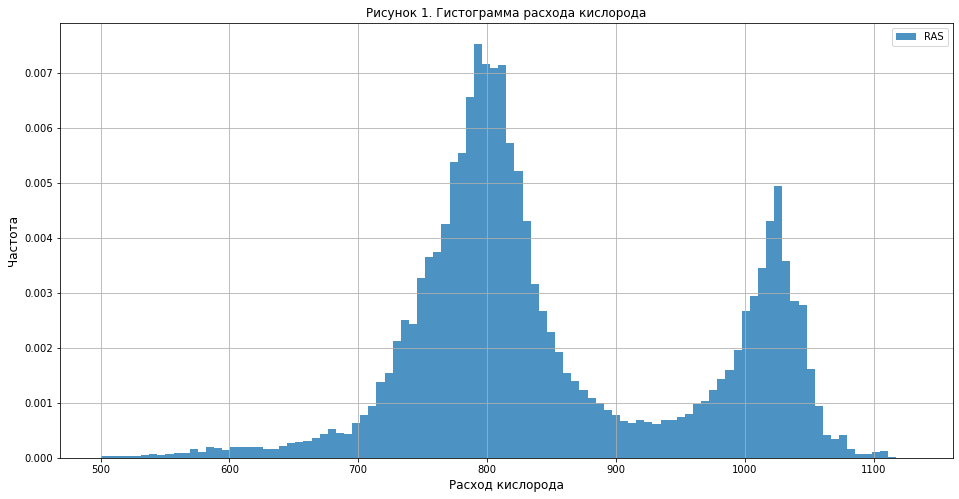

In [10]:
df_produv_train['RAS'].plot(kind='hist', bins=100, title='Рисунок 1. Гистограмма расхода кислорода', 
                            figsize=(16,8), alpha=.8, density=True, 
    legend=True, grid=True)
plt.xlabel('Расход кислорода', fontsize = 12)
plt.ylabel('Частота', fontsize = 12)
plt.show() 

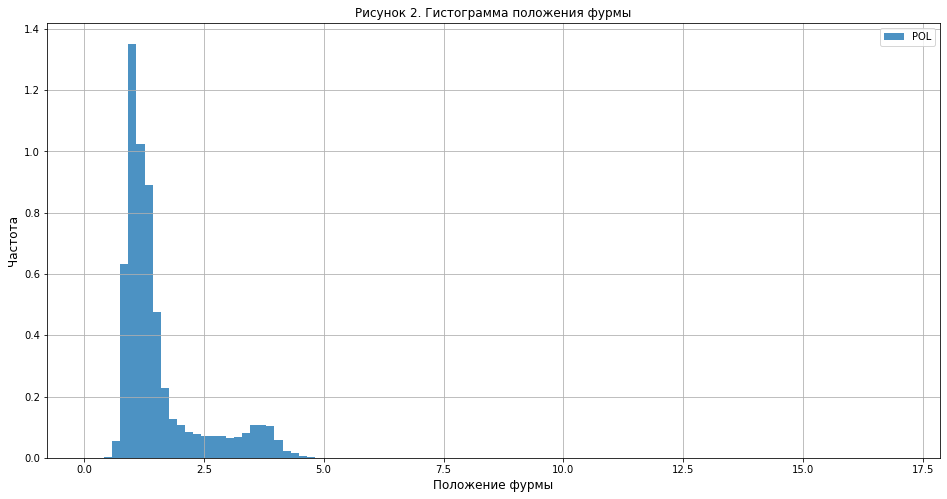

In [11]:
df_produv_train['POL'].plot(kind='hist', bins=100, title='Рисунок 2. Гистограмма положения фурмы', 
                            figsize=(16,8), alpha=.8, density=True, 
    legend=True, grid=True)
plt.xlabel('Положение фурмы', fontsize = 12)
plt.ylabel('Частота', fontsize = 12)
plt.show() 

Построим графики зависимости положения фурмы от времени измерения для нескольких плавок

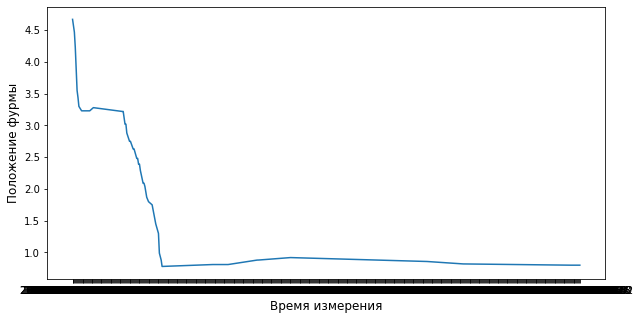

In [12]:
data_one_plav = df_produv_train.query('NPLV == 510020')
x = data_one_plav['SEC']
y = data_one_plav['POL']
plt.figure(figsize=(10,5))
plt.xlabel('Время измерения', fontsize = 12)
plt.ylabel('Положение фурмы', fontsize = 12)
plt.plot(x, y);

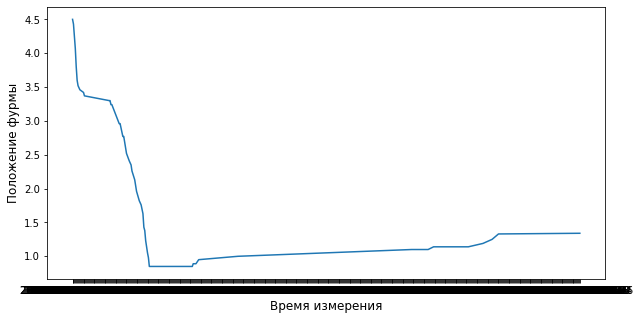

In [13]:
data_one_plav2 = df_produv_train.query('NPLV == 510018')
x = data_one_plav2['SEC']
y = data_one_plav2['POL']
plt.figure(figsize=(10,5))
plt.xlabel('Время измерения', fontsize = 12)
plt.ylabel('Положение фурмы', fontsize = 12)
plt.plot(x, y);

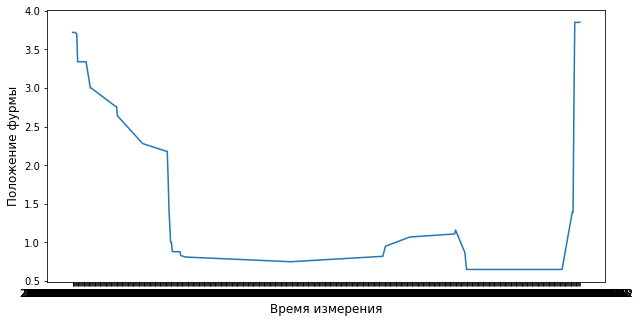

In [14]:
data_one_plav3 = df_produv_train.query('NPLV == 510010')
x = data_one_plav3['SEC']
y = data_one_plav3['POL']
plt.figure(figsize=(10,5))
plt.xlabel('Время измерения', fontsize = 12)
plt.ylabel('Положение фурмы', fontsize = 12)
plt.plot(x, y);

Построим графики зависимости расхода кислорода от времени измерения для нескольких плавок

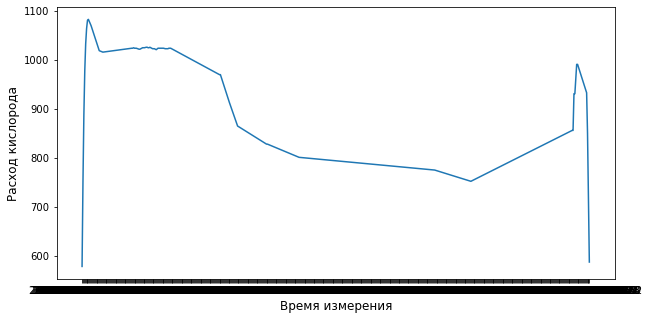

In [15]:
data_one_plav4 = df_produv_train.query('NPLV == 510020')
x = data_one_plav4['SEC']
y = data_one_plav4['RAS']
plt.figure(figsize=(10,5))
plt.xlabel('Время измерения', fontsize = 12)
plt.ylabel('Расход кислорода', fontsize = 12)
plt.plot(x, y);

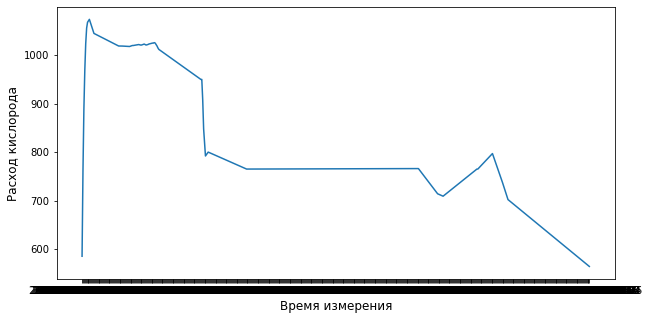

In [16]:
data_one_plav5 = df_produv_train.query('NPLV == 510018')
x = data_one_plav5['SEC']
y = data_one_plav5['RAS']
plt.figure(figsize=(10,5))
plt.xlabel('Время измерения', fontsize = 12)
plt.ylabel('Расход кислорода', fontsize = 12)
plt.plot(x, y);

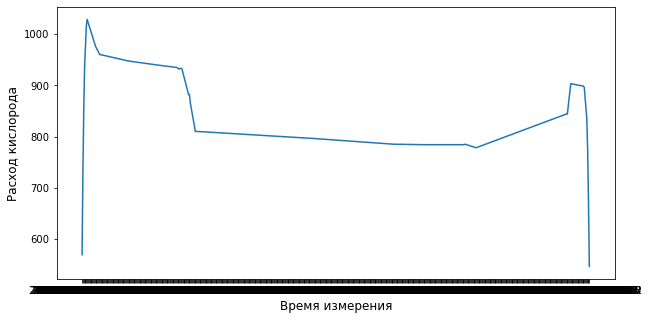

In [17]:
data_one_plav6 = df_produv_train.query('NPLV == 510010')
x = data_one_plav6['SEC']
y = data_one_plav6['RAS']
plt.figure(figsize=(10,5))
plt.xlabel('Время измерения', fontsize = 12)
plt.ylabel('Расход кислорода', fontsize = 12)
plt.plot(x, y);

Агрегируем данные по медианному расходу кислорода и положению фурмы для каждой плавки

In [18]:
plav_features_train = df_produv_train.groupby('NPLV').agg(lambda x: x.median()).reset_index()

In [19]:
plav_features_train['rashod_O2_median']=plav_features_train['RAS']
plav_features_train['poloshenie_furmy_median']=plav_features_train['POL']
plav_features_train.drop(['RAS', 'POL'], axis = 1, inplace = True)

In [20]:
display(plav_features_train)

,NPLV,rashod_O2_median,poloshenie_furmy_median
0,510008,832.066456,0.859639
1,510009,795.686567,0.838021
2,510010,802.622951,0.800734
3,510011,783.461078,1.068085
4,510012,783.510638,0.800000
...,...,...,...
2058,512318,820.000000,0.900000
2059,512319,844.000000,0.920000
2060,512320,789.000000,1.080000
2061,512321,723.000000,1.100000


# <a id='part6'>2.2. Хронометраж процесса (датасет chronom)</a>

In [21]:
display(df_chronom_train.head(50))

,Unnamed: 0,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2
0,35171,510008,межпл.прост.,межпл. простой,2011-01-01 10:28:13,2011-01-01 10:32:15,NaN
1,35162,510008,межпл.прост.,межпл. простой,2021-01-01 03:01:07,2021-01-01 03:08:11,NaN
2,35163,510008,межпл.прост.,Осмотр конвертера,2021-01-01 03:01:19,2021-01-01 03:03:43,NaN
3,35164,510008,межпл.прост.,Наведение гарнисажа,2021-01-01 03:03:43,2021-01-01 03:05:23,NaN
4,35165,510008,межпл.прост.,Слив шлака,2021-01-01 03:05:23,2021-01-01 03:06:09,NaN
5,35166,510008,межпл.прост.,Отсутствие O2,2021-01-01 03:06:09,2021-01-01 03:08:15,NaN
6,26,510008,опер,Завалка лома,2021-01-01 03:08:11,2021-01-01 03:08:27,NaN
7,27,510008,опер,Нагрев лома,2021-01-01 03:08:27,2021-01-01 03:14:32,NaN
8,33235,510008,опер,Нагрев лома,2021-01-01 03:08:27,2021-01-01 03:14:32,2909.0
9,28,510008,опер,Заливка чугуна,2021-01-01 03:15:02,2021-01-01 03:18:25,NaN


In [22]:
print(df_chronom_train['NOP'].unique())

['межпл. простой' 'Осмотр конвертера' 'Наведение гарнисажа' 'Слив шлака'
 'Отсутствие O2' 'Завалка лома' 'Нагрев лома' 'Заливка чугуна' 'Продувка'
 'Повалка' 'Ожидание стальковша' 'Выпуск металла' 'Прерыв. выпуска'
 'Вхождение в гр.МНЛЗ' 'Обрыв горловины' 'Додувка на t'
 'Наложение продувки' 'Охл. азотом' 'Подварка  футеровки'
 'Отсутствие чугуна' 'Отсечка шлака' 'Додувка на C' 'Неиспр. механ. обор.'
 'Неиспр. электр. обор' 'Ремонт летки' 'Замена фурмы' 'ППР'
 'Отсутствие мет.шихты' 'Полусухое торкрет.' 'Ожидание шл.чаш'
 'Отсут. своб.разл.пл.' 'Замер положения фурм' 'Неиспр. энерг. обор'
 'Неиспр. АСУ и КИПиА' 'Скач. шлака']


Получим длительность продувки

In [23]:
model_chronom = df_chronom_train.query('NOP == "Продувка"')
model_chronom['VR_KON'] = pd.to_datetime(model_chronom['VR_KON'])
model_chronom['VR_NACH'] = pd.to_datetime(model_chronom['VR_NACH'])
model_chronom['PRODUV_DLIT'] = (model_chronom['VR_KON'] - model_chronom['VR_NACH']).dt.total_seconds()

<ipython-input-23-53183b8821db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_chronom['VR_KON'] = pd.to_datetime(model_chronom['VR_KON'])
<ipython-input-23-53183b8821db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_chronom['VR_NACH'] = pd.to_datetime(model_chronom['VR_NACH'])
<ipython-input-23-53183b8821db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [24]:
model_chronom

,Unnamed: 0,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2,PRODUV_DLIT
10,29,510008,опер,Продувка,2021-01-01 03:18:25,2021-01-01 03:37:55,NaN,1170.0
29,37,510009,опер,Продувка,2021-01-01 04:26:54,2021-01-01 04:47:24,NaN,1230.0
43,45,510010,опер,Продувка,2021-01-01 05:25:08,2021-01-01 05:45:34,NaN,1226.0
57,53,510011,опер,Продувка,2021-01-01 06:23:51,2021-01-01 06:41:29,NaN,1058.0
72,62,510012,опер,Продувка,2021-01-01 07:26:05,2021-01-01 07:46:44,NaN,1239.0
...,...,...,...,...,...,...,...,...
34331,20905,512318,опер,Продувка,2021-04-26 13:10:10,2021-04-26 13:27:53,NaN,1063.0
34351,20914,512319,опер,Продувка,2021-04-26 14:37:39,2021-04-26 14:56:07,NaN,1108.0
34367,20923,512320,опер,Продувка,2021-04-26 15:35:46,2021-04-26 15:53:24,NaN,1058.0
34383,20932,512321,опер,Продувка,2021-04-26 16:36:02,2021-04-26 16:55:31,NaN,1169.0


Получим расход кислорода за время продувки, додувки и тд

In [25]:
rashod_O2_produv = df_produv_train.merge((df_chronom_train[['NPLV', 'VR_NACH','VR_KON','NOP']].
                    query('NOP == ["Продувка","Додувка на t", "Додувка на C", "Нагрев лома"]')), how = 'left', on = 'NPLV')

In [26]:
rashod_O2_produv = rashod_O2_produv.query('SEC > VR_NACH and SEC < VR_KON')
rashod_O2_produv.drop(['SEC', 'VR_NACH', 'VR_KON', 'NOP', 'POL'], axis = 1, inplace = True)
rashod_O2_produv = rashod_O2_produv.groupby('NPLV').agg(lambda x: 2*x.sum()).reset_index()
rashod_O2_produv['rashod_O2_produv_summarnyi']=rashod_O2_produv['RAS']

In [27]:
rashod_O2_produv.drop(['RAS'], axis = 1, inplace = True)

In [28]:
rashod_O2_produv

,NPLV,rashod_O2_produv_summarnyi
0,510008,968595.0
1,510009,1017089.0
2,510010,1000536.0
3,510011,846278.0
4,510012,1001355.0
...,...,...
2058,512318,1011224.0
2059,512319,1033210.0
2060,512320,877938.0
2061,512321,956368.0


In [29]:
model_produv_train = plav_features_train.merge(rashod_O2_produv, how = 'left', on = 'NPLV')
model_produv_train2=model_produv_train.merge(model_chronom, how = 'left', on= 'NPLV')
model_produv_train2

,NPLV,rashod_O2_median,poloshenie_furmy_median,rashod_O2_produv_summarnyi,Unnamed: 0,TYPE_OPER,NOP,VR_NACH,VR_KON,O2,PRODUV_DLIT
0,510008,832.066456,0.859639,968595.0,29,опер,Продувка,2021-01-01 03:18:25,2021-01-01 03:37:55,NaN,1170.0
1,510009,795.686567,0.838021,1017089.0,37,опер,Продувка,2021-01-01 04:26:54,2021-01-01 04:47:24,NaN,1230.0
2,510010,802.622951,0.800734,1000536.0,45,опер,Продувка,2021-01-01 05:25:08,2021-01-01 05:45:34,NaN,1226.0
3,510011,783.461078,1.068085,846278.0,53,опер,Продувка,2021-01-01 06:23:51,2021-01-01 06:41:29,NaN,1058.0
4,510012,783.510638,0.800000,1001355.0,62,опер,Продувка,2021-01-01 07:26:05,2021-01-01 07:46:44,NaN,1239.0
...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,820.000000,0.900000,1011224.0,20905,опер,Продувка,2021-04-26 13:10:10,2021-04-26 13:27:53,NaN,1063.0
2059,512319,844.000000,0.920000,1033210.0,20914,опер,Продувка,2021-04-26 14:37:39,2021-04-26 14:56:07,NaN,1108.0
2060,512320,789.000000,1.080000,877938.0,20923,опер,Продувка,2021-04-26 15:35:46,2021-04-26 15:53:24,NaN,1058.0
2061,512321,723.000000,1.100000,956368.0,20932,опер,Продувка,2021-04-26 16:36:02,2021-04-26 16:55:31,NaN,1169.0


In [30]:
model_produv_train2.drop(['Unnamed: 0', 'TYPE_OPER', 'NOP', 'VR_NACH', 'VR_KON', 'O2'], axis=1, inplace = True)
model_produv_train2

,NPLV,rashod_O2_median,poloshenie_furmy_median,rashod_O2_produv_summarnyi,PRODUV_DLIT
0,510008,832.066456,0.859639,968595.0,1170.0
1,510009,795.686567,0.838021,1017089.0,1230.0
2,510010,802.622951,0.800734,1000536.0,1226.0
3,510011,783.461078,1.068085,846278.0,1058.0
4,510012,783.510638,0.800000,1001355.0,1239.0
...,...,...,...,...,...
2058,512318,820.000000,0.900000,1011224.0,1063.0
2059,512319,844.000000,0.920000,1033210.0,1108.0
2060,512320,789.000000,1.080000,877938.0,1058.0
2061,512321,723.000000,1.100000,956368.0,1169.0


# <a id='part6'>2.3. Характеристика лома (датасет lom)</a>

In [31]:
df_lom_train.head(30)

,NPLV,VDL,NML,VES
0,510008,4,К,56500
1,510008,8,О,16700
2,510008,13,КП,3000
3,510009,4,К,49800
4,510009,8,О,22800
5,510009,13,КП,6000
6,510010,4,К,45900
7,510010,13,КП,2000
8,510010,23,ЛЧ,6000
9,510010,8,О,22400


Изучим расход лома каждой марки

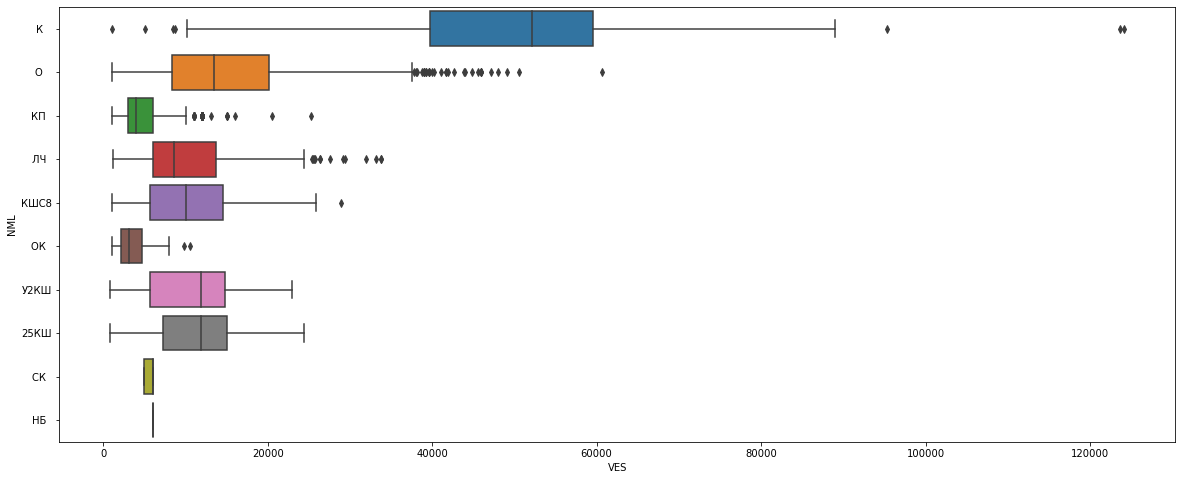

In [32]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="VES", y= "NML", data = df_lom_train, orient = "h") 

***Промежуточный вывод:*** Как видно из графика существуют выбросы по добавке лома. Удалим их. 

In [33]:
df_lom_train_clean=df_lom_train.query('VES <50000')

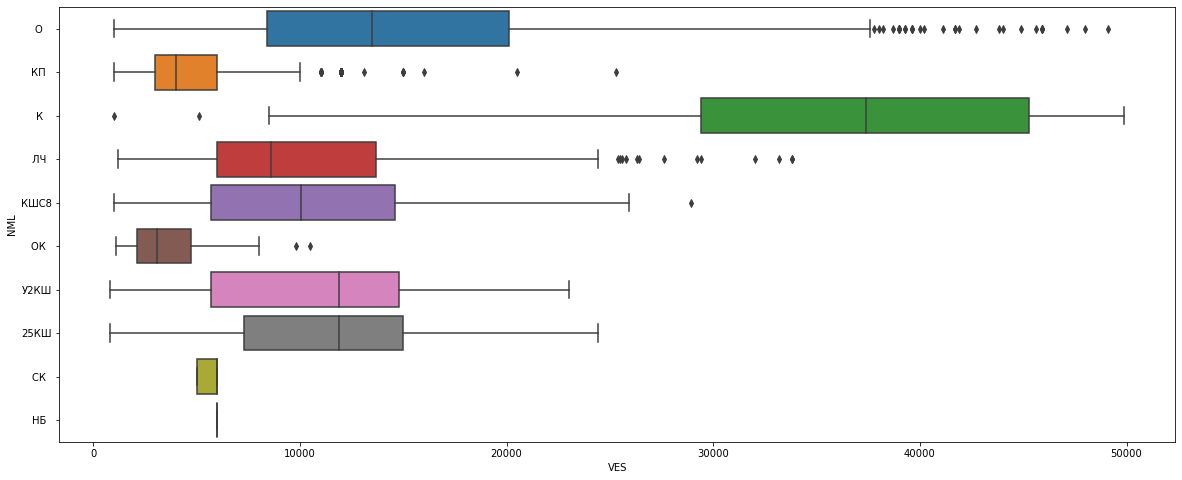

In [34]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="VES", y= "NML", data = df_lom_train_clean, orient = "h") 

Из данной таблицы для каждой плавки возьмем код лома и вес лома. \
Вид лома влияет на скорость расплавления и другие физико-химические процессы происходящие в агрегате.
Вес лома непосредственно влияет на количество энергии которое необходимо затратить на его расплавление, 
то есть на расход кислорода и время продувки, а также на объем углерода и других легирующих элементов которые 
будут внесены вместе с ломом в расплав.

In [35]:
data_lom_ohe = df_lom_train_clean
col_ohe = pd.get_dummies(df_lom_train_clean['VDL'], prefix = 'VDL')
data_lom_ohe = pd.concat((data_lom_ohe, col_ohe), axis=1).drop(['VDL'], axis=1)


vdl_list = data_lom_ohe.columns.tolist()[3:]
for col in vdl_list:
    data_lom_ohe[col] = data_lom_ohe[col]*data_lom_ohe['VES']
data_lom_ohe.drop(['NML', 'VES'], axis=1, inplace = True)

Создадим таблицу в которой каждый вид лома будет отдельным признаком и укажем его вес в плавке.

In [36]:
data_lom_ohe.head(10)

,NPLV,VDL_3,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63
1,510008,0,0,16700,0,0,0,0,0,0,0
2,510008,0,0,0,3000,0,0,0,0,0,0
3,510009,0,49800,0,0,0,0,0,0,0,0
4,510009,0,0,22800,0,0,0,0,0,0,0
5,510009,0,0,0,6000,0,0,0,0,0,0
6,510010,0,45900,0,0,0,0,0,0,0,0
7,510010,0,0,0,2000,0,0,0,0,0,0
8,510010,0,0,0,0,0,6000,0,0,0,0
9,510010,0,0,22400,0,0,0,0,0,0,0
11,510011,0,0,0,3000,0,0,0,0,0,0


Сгрупируем по номеру плавки

In [37]:
data_lom_ohe = data_lom_ohe.groupby('NPLV').agg(lambda x: x.sum()).reset_index()
data_lom_ohe

,NPLV,VDL_3,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63
0,510008,0,0,16700,3000,0,0,0,0,0,0
1,510009,0,49800,22800,6000,0,0,0,0,0,0
2,510010,0,45900,22400,2000,0,6000,0,0,0,0
3,510011,0,0,29200,3000,0,0,0,0,0,0
4,510012,0,0,6100,6000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2030,512318,0,0,3300,3000,0,11500,4100,0,0,0
2031,512319,0,46400,15300,5000,0,9900,0,0,0,0
2032,512320,0,41400,0,5000,0,0,17800,0,0,0
2033,512321,0,0,4200,3000,0,0,0,0,0,0


# <a id='part6'>2.4. Основная информация о плавке(датасет plavki)</a>

In [38]:
df_plavki_train.head(10)

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL
0,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11
1,510009,2021-01-01 04:00:44,2021-01-01 05:07:28,С255,МНЛЗ,972,цилиндрическая,12,5 сопловая,12
2,510010,2021-01-01 05:12:29,2021-01-01 06:00:53,Ст3пс/Э,Изл,973,цилиндрическая,13,5 сопловая,13
3,510011,2021-01-01 06:13:48,2021-01-01 07:08:39,Св-08А.z02,Изл,974,цилиндрическая,14,5 сопловая,14
4,510012,2021-01-01 07:13:44,2021-01-01 08:01:59,SC2M/ЭТ,МНЛС,975,цилиндрическая,15,5 сопловая,15
5,510013,2021-01-01 08:22:12,2021-01-01 09:10:39,SC2M/ЭТ,МНЛС,976,цилиндрическая,16,5 сопловая,16
6,510014,2021-01-01 09:27:38,2021-01-01 10:25:35,SC2M/ЭТ,МНЛС,977,цилиндрическая,17,5 сопловая,17
7,510015,2021-01-01 10:51:27,2021-01-01 11:49:23,SC2M/ЭТ,МНЛС,978,цилиндрическая,18,5 сопловая,18
8,510016,2021-01-01 11:54:29,2021-01-01 12:42:03,SC2M/ЭТ,МНЛС,979,цилиндрическая,19,5 сопловая,19
9,510017,2021-01-01 12:58:00,2021-01-01 14:10:05,Ш2.1,МНЛЗ,980,цилиндрическая,20,5 сопловая,20


NPLV - номер плавки

plavka_VR_NACH - время начала плавки.

plavka_VR_KON - время окончания плавки.

plavka_NMZ - марка заданная. \
Является важным параметром, т.к. в классическом конвертерном процессе содержание углерода в расплаве после продувки должно находиться на уровне не выше чем содержание углерода в выплавляемой марке стали. Остальные элементы, необходимые для получения заданной стали, будут добавлены позже в ковше и находятся за рамками нашей задачи.
Предположительно содержание углерода в выплавляемой стали должно быть близко к значению углерода которое необходимо найти.

plavka_NAPR_ZAD - направление разливки. \
Является важным параметром - показывает насколько мы должны перегреть металл для того или иного способа разливки стали.

plavka_STFUT - стойкость футеровки конвертера. \
Данная характеристика не должна влиять на целевые показатели. Исключим её из итоговой таблицы.

plavka_TIPE_FUR - тип фурмы. \
Предположительно данный признак незначительно влияет на результат, либо его влияние очень сильно коррелирует с признаком "Тип головки фурмы". Удалим признак из итоговой таблицы.

plavka_ST_FURM - стойкость фурмы. \
Данная характеристика не должна влиять на целевые показатели. Исключим её из итоговой таблицы.

plavka_TIPE_GOL - тип головки фурмы. \
Данный признак незначительно, но может влиять на физико-химические процессы в расплаве и скорость взаимодействия между кислородом и элементами в металле и шлаке. Но скорость реакций мы можем найти более корректно по отходящим газам. Исключим данный признак.

plavka_ST_GOL - стойкость головки фурмы. \
Данная характеристика не должна влиять на целевые показатели. Исключим её из итоговой таблицы.

Подготовим данные из датасета "plavki" необходимые для построения модели

In [39]:
df_plavki_train_clean = df_plavki_train.drop(['plavka_VR_NACH', 'plavka_VR_KON', 'plavka_TIPE_FUR', 'plavka_TIPE_GOL'], axis=1)

In [40]:
df_plavki_train_clean

,NPLV,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL
0,510008,С255,МНЛЗ,971,11,11
1,510009,С255,МНЛЗ,972,12,12
2,510010,Ст3пс/Э,Изл,973,13,13
3,510011,Св-08А.z02,Изл,974,14,14
4,510012,SC2M/ЭТ,МНЛС,975,15,15
...,...,...,...,...,...,...
2132,512318,C071TM.z01/ЭТ,МНЛС,3281,22,56
2133,512319,C071TM.z01/ЭТ,МНЛС,3282,23,57
2134,512320,40Х.1,МНЛЗ,3283,24,58
2135,512321,40Х.1,МНЛЗ,3284,25,59


Создадим таблицу в которой для каждой марки стали укажем среднюю концентрацию углерода.

In [41]:
c_steel = pd.DataFrame(df_plavki_train_clean['plavka_NMZ'].unique().tolist(), columns = ['plavka_NMZ'])
c_steel

,plavka_NMZ
0,С255
1,Ст3пс/Э
2,Св-08А.z02
3,SC2M/ЭТ
4,Ш2.1
...,...
61,SAE1008.z13/ЭТ
62,09Г2СДП155
63,09Г2С.18
64,1PS.z02/ЭТ


Дополним таблицу столбцом с содержанием углерода для каждой марки. Данные возьмем из Открытых источников.
Вручную создан файл, подгрузим его.

In [42]:
steel_mark = pd.read_csv("steel_mark.csv")
c_steel = c_steel.merge(steel_mark, how = 'left', on = 'plavka_NMZ')
c_steel

,plavka_NMZ,C_STEEL,ISTOCHNIK
0,С255,0.170,https://metinvestholding.com/ru/products/steel-grades/s255
1,Ст3пс/Э,0.220,https://metinvestholding.com/ru/products/steel-grades/st3ps
2,Св-08А.z02,0.100,http://www.splav-kharkov.com/mat_start.php?name_id=3136
3,SC2M/ЭТ,0.045,https://www.ifcg.ru/kb/tnved/7207121000/
4,Ш2.1,0.900,https://www.metalinfo.ru/ru/russteel/96568
...,...,...,...
61,SAE1008.z13/ЭТ,0.100,https://metinvestholding.com/Content/CmsFile/ua/brochures__Katanka_SAE1006_SAE1008_2.pdf
62,09Г2СДП155,0.120,https://metinvestholding.com/ru/products/steel-grades/09g2s
63,09Г2С.18,0.120,https://metinvestholding.com/ru/products/steel-grades/09g2s
64,1PS.z02/ЭТ,0.120,https://metinvestholding.com/ru/products/steel-grades/st1ps


Соберем признаки полученные из таблицы plavki в одну таблицу

In [43]:
model_plav = df_plavki_train_clean.merge(c_steel, how = 'left', on = 'plavka_NMZ')
model_plav.drop(['ISTOCHNIK','plavka_NMZ'], axis=1, inplace = True)
model_plav

,NPLV,plavka_NAPR_ZAD,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL
0,510008,МНЛЗ,971,11,11,0.170
1,510009,МНЛЗ,972,12,12,0.170
2,510010,Изл,973,13,13,0.220
3,510011,Изл,974,14,14,0.100
4,510012,МНЛС,975,15,15,0.045
...,...,...,...,...,...,...
2132,512318,МНЛС,3281,22,56,0.057
2133,512319,МНЛС,3282,23,57,0.057
2134,512320,МНЛЗ,3283,24,58,0.440
2135,512321,МНЛЗ,3284,25,59,0.440


Изучим разброс данных в получившейся таблице

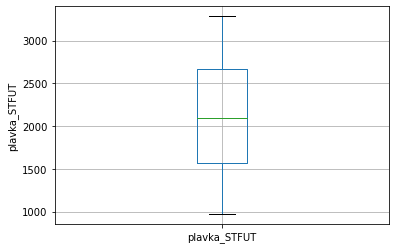

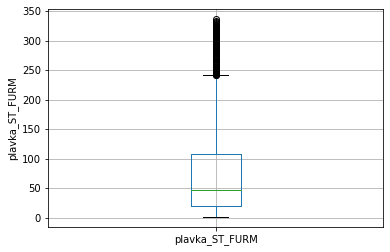

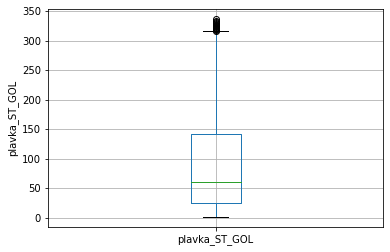

In [44]:
data_plavki=model_plav[['plavka_STFUT', 'plavka_ST_FURM', 'plavka_ST_GOL']]
for i in data_plavki:
    plt.figure()
    plt.ylabel(i)
    data_plavki.boxplot(i)

Как видно из графиков выбросы есть, но они не слишком значительные. Оставим все как есть. 

***Обработаем параметр направление разливки***

Добавим в датасет среднее значение температуры металла из интервала в зависимости от направления разливки.
Данные возьмем из документа в открытых источниках 
"https://evraz-srm-003.sib.evraz.com/getfile?tender=1000129183&attachment=005056A43DFC1EDA9FAD2C9155AB0949"

In [45]:
for i in range(len(model_plav)):
    if model_plav.loc[i, 'plavka_NAPR_ZAD'] == "МНЛС": 
        model_plav.loc[i, 'TEMP_RAZLIV_MEAN'] = 1650
    if model_plav.loc[i, 'plavka_NAPR_ZAD'] == "МНЛЗ": 
        model_plav.loc[i, 'TEMP_RAZLIV_MEAN'] = 1625
    if model_plav.loc[i, 'plavka_NAPR_ZAD'] == "Изл":
        model_plav.loc[i, 'TEMP_RAZLIV_MEAN'] = 1612

In [46]:
model_plav= model_plav.drop(['plavka_NAPR_ZAD'], axis = 1)
model_plav 

,NPLV,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN
0,510008,971,11,11,0.170,1625.0
1,510009,972,12,12,0.170,1625.0
2,510010,973,13,13,0.220,1612.0
3,510011,974,14,14,0.100,1612.0
4,510012,975,15,15,0.045,1650.0
...,...,...,...,...,...,...
2132,512318,3281,22,56,0.057,1650.0
2133,512319,3282,23,57,0.057,1650.0
2134,512320,3283,24,58,0.440,1625.0
2135,512321,3284,25,59,0.440,1625.0


# <a id='part6'>2.5. Сыпучие добавки (датасет sip)</a>

In [47]:
df_sip_train

,NPLV,VDSYP,NMSYP,VSSYP,DAT_OTD
0,510008,346,Уголь ТО,570,2021-01-01 03:03:53
1,510008,346,Уголь ТО,220,2021-01-01 03:04:10
2,510008,408,изв_ЦОИ,7300,2021-01-01 03:08:17
3,510008,346,Уголь ТО,270,2021-01-01 03:09:03
4,510008,346,Уголь ТО,430,2021-01-01 03:09:20
...,...,...,...,...,...
31579,512322,408,изв_ЦОИ,30,2021-04-26 18:28:06
31580,512322,408,изв_ЦОИ,490,2021-04-26 18:28:07
31581,512322,408,изв_ЦОИ,20,2021-04-26 18:28:22
31582,512322,408,изв_ЦОИ,970,2021-04-26 18:30:26


In [48]:
df_sip_train['NMSYP'].unique().tolist()

['Уголь ТО', 'изв_ЦОИ', 'Флюс ФОМИ', 'ФЛЮМАГ', 'изв отсев', 'Долом(сыр)']

Закодируем тип флюса

In [49]:
data_sip_ohe = df_sip_train
col_ohe = pd.get_dummies(df_sip_train['NMSYP'], prefix = 'NMSYP')
data_sip_ohe = pd.concat((data_sip_ohe, col_ohe), axis=1).drop(['NMSYP'], axis=1)

vdsyp_list = data_sip_ohe.columns.tolist()[4:]
for col in vdsyp_list:
    data_sip_ohe[col] = data_sip_ohe[col]*data_sip_ohe['VSSYP']
data_sip_ohe.drop(['VDSYP', 'VSSYP', 'DAT_OTD'], axis=1, inplace = True)

Агрегируем данные по сыпучим если они подаются несколько раз за плавку

In [50]:
data_sip_ohe = data_sip_ohe.groupby('NPLV').agg(lambda x: x.sum()).reset_index()

Сложим всю известь

In [51]:
data_sip_ohe['Изв_общ']=data_sip_ohe['NMSYP_изв отсев']+data_sip_ohe['NMSYP_изв_ЦОИ']

In [52]:
data_sip_ohe.drop(['NMSYP_изв отсев', 'NMSYP_изв_ЦОИ'], axis=1, inplace = True)

In [53]:
data_sip_ohe

,NPLV,NMSYP_Долом(сыр),NMSYP_Уголь ТО,NMSYP_ФЛЮМАГ,NMSYP_Флюс ФОМИ,Изв_общ
0,510008,0,2950,2960,980,14080
1,510009,0,2930,0,960,19890
2,510010,0,2990,2960,1050,17070
3,510011,0,3620,0,980,22700
4,510012,0,2930,3010,1000,21600
...,...,...,...,...,...,...
2058,512318,0,0,2890,0,14640
2059,512319,0,960,2820,0,19210
2060,512320,0,1380,2830,0,19420
2061,512321,0,520,2310,0,16100


Изучим разброс данных в получившейся таблцие

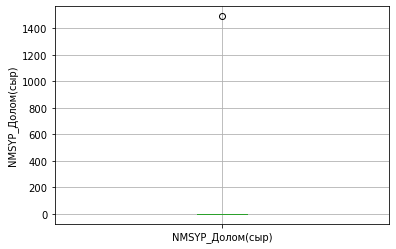

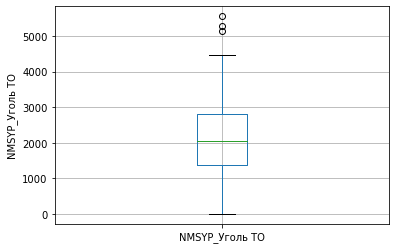

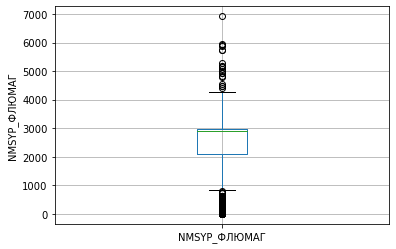

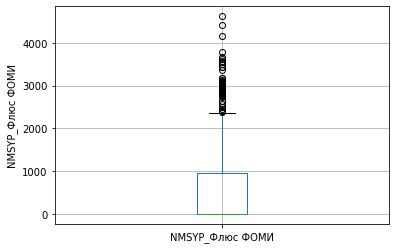

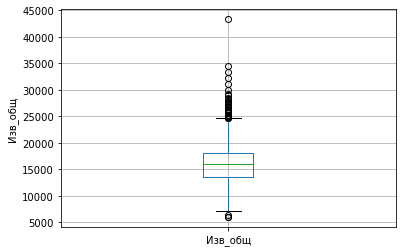

In [54]:
data_sip_ohe_data=data_sip_ohe[['NMSYP_Долом(сыр)', 'NMSYP_Уголь ТО', 'NMSYP_ФЛЮМАГ', 'NMSYP_Флюс ФОМИ', 'Изв_общ']]
for i in data_sip_ohe_data:
    plt.figure()
    plt.ylabel(i)
    data_sip_ohe_data.boxplot(i)

Создадим окончательную таблицу

In [55]:
data_sip_ohe.drop('NMSYP_Долом(сыр)', axis=1, inplace = True)

In [56]:
model_sip=data_sip_ohe
model_sip

,NPLV,NMSYP_Уголь ТО,NMSYP_ФЛЮМАГ,NMSYP_Флюс ФОМИ,Изв_общ
0,510008,2950,2960,980,14080
1,510009,2930,0,960,19890
2,510010,2990,2960,1050,17070
3,510011,3620,0,980,22700
4,510012,2930,3010,1000,21600
...,...,...,...,...,...
2058,512318,0,2890,0,14640
2059,512319,960,2820,0,19210
2060,512320,1380,2830,0,19420
2061,512321,520,2310,0,16100


# <a id='part6'>2.6. Характеристика чугуна (датасет chugun)</a>

In [57]:
df_chugun_train.head(30)

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096,2021-01-01 04:23:48
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110,2021-01-01 05:21:40
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110,2021-01-01 06:20:57
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070,2021-01-01 07:23:02
5,510013,263500.0,1398.0,0.49,0.30,0.014,0.092,0.03,0.01,0.03,0.113,0.110,2021-01-01 08:32:54
6,510014,264500.0,1404.0,0.71,0.26,0.013,0.107,0.02,0.01,0.04,0.089,0.097,2021-01-01 09:47:34
7,510015,263600.0,1414.0,0.64,0.29,0.012,0.101,0.03,0.01,0.04,0.099,0.110,2021-01-01 11:00:51
8,510016,264900.0,1423.0,0.64,0.22,0.013,0.086,0.02,0.01,0.03,0.070,0.086,2021-01-01 12:03:43
9,510017,279200.0,1402.0,0.65,0.26,0.015,0.094,0.03,0.01,0.03,0.087,0.100,2021-01-01 13:07:28


С учетом того что температура металла была измерена не непосредственно перед заливкой, а в момент выпуска из миксера, 
то за разницу времени металл мог остыть на некоторую температуру, для того чтобы учесть данный момент в нашем кейсе 
добавим в датасет разницу между временем начала продувки каждой плавки и временем отбора пробы чугуна (датасет chugun).

In [58]:
model_time_start_produv = df_chronom_train.query('NOP == "Продувка"')
model_time_chugun = df_chugun_train[['NPLV','DATA_ZAMERA']]
model_time_delta = model_time_start_produv.merge(model_time_chugun, how = 'left', on = 'NPLV')
model_time_delta.drop(['Unnamed: 0','TYPE_OPER','NOP','O2'], axis = 1,inplace = True)
model_time_delta['VR_NACH'] = pd.to_datetime(model_time_delta['VR_NACH'])
model_time_delta['DATA_ZAMERA'] = pd.to_datetime(model_time_delta['DATA_ZAMERA'])
model_time_delta['TIME_DELTA'] = (model_time_delta['VR_NACH'] - model_time_delta['DATA_ZAMERA']).dt.total_seconds()
model_time_delta

,NPLV,VR_NACH,VR_KON,DATA_ZAMERA,TIME_DELTA
0,510008,2021-01-01 03:18:25,2021-01-01 03:37:55,2021-01-01 03:15:03,202.0
1,510009,2021-01-01 04:26:54,2021-01-01 04:47:24,2021-01-01 04:23:48,186.0
2,510010,2021-01-01 05:25:08,2021-01-01 05:45:34,2021-01-01 05:21:40,208.0
3,510011,2021-01-01 06:23:51,2021-01-01 06:41:29,2021-01-01 06:20:57,174.0
4,510012,2021-01-01 07:26:05,2021-01-01 07:46:44,2021-01-01 07:23:02,183.0
...,...,...,...,...,...
2058,512318,2021-04-26 13:10:10,2021-04-26 13:27:53,2021-04-26 12:53:40,990.0
2059,512319,2021-04-26 14:37:39,2021-04-26 14:56:07,2021-04-26 14:21:57,942.0
2060,512320,2021-04-26 15:35:46,2021-04-26 15:53:24,2021-04-26 14:33:29,3737.0
2061,512321,2021-04-26 16:36:02,2021-04-26 16:55:31,2021-04-26 15:50:53,2709.0


Добавим столбец с содержанием углерода

In [59]:
df_chugun_train['C']=df_chugun_train['NI']
df_chugun_train['C']='4.7'

In [60]:
df_chugun_train

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA,C
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03,4.7
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096,2021-01-01 04:23:48,4.7
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110,2021-01-01 05:21:40,4.7
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110,2021-01-01 06:20:57,4.7
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070,2021-01-01 07:23:02,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.01,0.02,0.081,0.060,2021-04-26 12:53:40,4.7
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.01,0.02,0.079,0.081,2021-04-26 14:21:57,4.7
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.01,0.03,0.086,0.066,2021-04-26 14:33:29,4.7
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.02,0.01,0.03,0.076,0.060,2021-04-26 15:50:53,4.7


In [61]:
df_chugun_model=df_chugun_train.merge(model_time_delta, how = 'left', on = 'NPLV')

In [62]:
df_chugun_model.drop(['DATA_ZAMERA_x', 'VR_NACH', 'VR_KON', 'DATA_ZAMERA_y'], axis=1, inplace=True)

In [63]:
df_chugun_model

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,C,TIME_DELTA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,4.7,202.0
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096,4.7,186.0
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110,4.7,208.0
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110,4.7,174.0
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070,4.7,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.01,0.02,0.081,0.060,4.7,990.0
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.01,0.02,0.079,0.081,4.7,942.0
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.01,0.03,0.086,0.066,4.7,3737.0
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.02,0.01,0.03,0.076,0.060,4.7,2709.0


Проверим распределения в данных

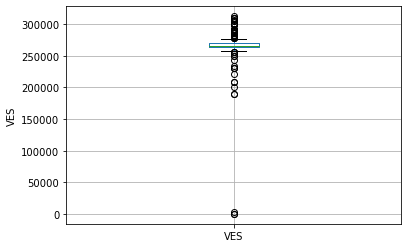

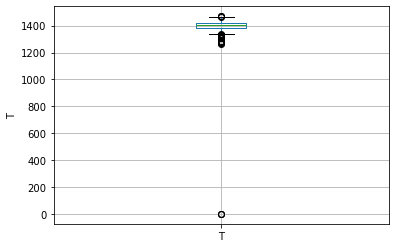

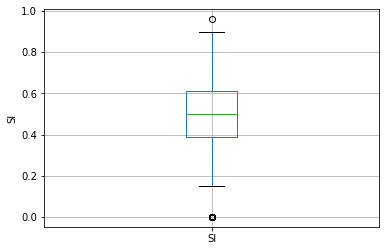

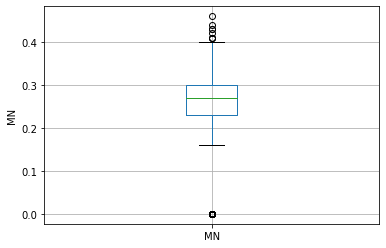

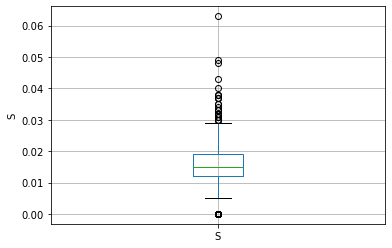

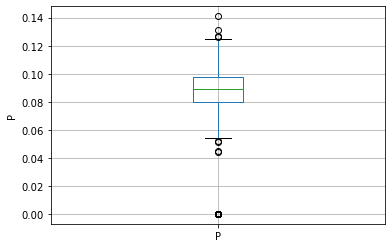

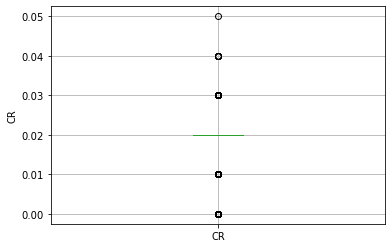

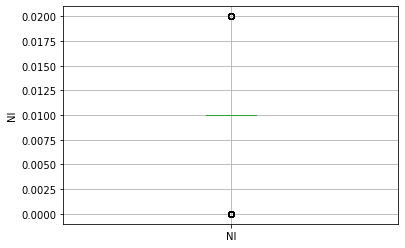

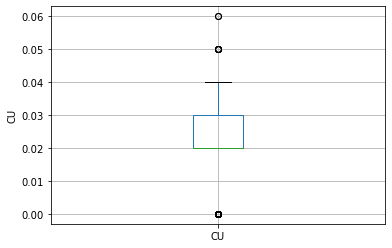

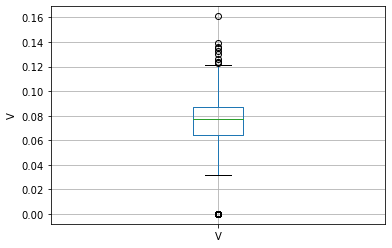

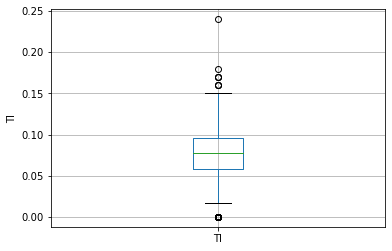

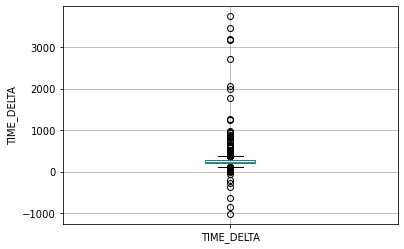

In [64]:
df_chugun_model_data=df_chugun_model[['VES', 'T', 'SI', 'MN', 'S', 'P', 
                                  'CR', 'NI', 'CU', 'V', 'TI', 'TIME_DELTA']]
for i in df_chugun_model_data:
    plt.figure()
    plt.ylabel(i)
    df_chugun_model_data.boxplot(i)

Получим финальный датасет по чугуну

In [65]:
df_chugun_model

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,C,TIME_DELTA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,4.7,202.0
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096,4.7,186.0
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110,4.7,208.0
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110,4.7,174.0
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070,4.7,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.01,0.02,0.081,0.060,4.7,990.0
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.01,0.02,0.079,0.081,4.7,942.0
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.01,0.03,0.086,0.066,4.7,3737.0
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.02,0.01,0.03,0.076,0.060,4.7,2709.0


In [66]:
df_chugun_model.drop(['CR', 'NI',], axis=1, inplace=True)

In [67]:
df_chugun_model

,NPLV,VES,T,SI,MN,S,P,CU,V,TI,C,TIME_DELTA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.103,0.084,4.7,202.0
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.03,0.084,0.096,4.7,186.0
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.115,0.110,4.7,208.0
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.02,0.112,0.110,4.7,174.0
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.03,0.083,0.070,4.7,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.081,0.060,4.7,990.0
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.079,0.081,4.7,942.0
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.086,0.066,4.7,3737.0
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.03,0.076,0.060,4.7,2709.0


In [68]:
df_chugun_model['TIME_DELTA']=df_chugun_model['TIME_DELTA'].mean()

In [69]:
df_chugun_model

,NPLV,VES,T,SI,MN,S,P,CU,V,TI,C,TIME_DELTA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.103,0.084,4.7,256.856035
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.03,0.084,0.096,4.7,256.856035
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.115,0.110,4.7,256.856035
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.02,0.112,0.110,4.7,256.856035
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.03,0.083,0.070,4.7,256.856035
...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.081,0.060,4.7,256.856035
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.079,0.081,4.7,256.856035
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.086,0.066,4.7,256.856035
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.03,0.076,0.060,4.7,256.856035


In [70]:
df_chugun_model=df_chugun_model.query('T>0 and VES>0')

In [71]:
df_chugun_model

,NPLV,VES,T,SI,MN,S,P,CU,V,TI,C,TIME_DELTA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.103,0.084,4.7,256.856035
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.03,0.084,0.096,4.7,256.856035
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.115,0.110,4.7,256.856035
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.02,0.112,0.110,4.7,256.856035
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.03,0.083,0.070,4.7,256.856035
...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.081,0.060,4.7,256.856035
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.079,0.081,4.7,256.856035
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.086,0.066,4.7,256.856035
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.03,0.076,0.060,4.7,256.856035


# <a id='part6'>2.7. Информация об анализе отходящих газов (датасет gas)</a>

In [72]:
df_gas_train

,NPLV,Time,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure
0,510008,2021-01-01 03:08:11.437,218263.343750,262.847229,18.722993,80.132247,0.087755,0.163878,9.229025e-03,0.893243,0.000000,0.000000,13.085938
1,510008,2021-01-01 03:08:12.437,218263.343750,262.847229,18.732721,80.138406,0.087959,0.148980,8.390023e-03,0.892948,0.000000,0.000000,13.085938
2,510008,2021-01-01 03:08:13.437,218369.359375,262.152771,18.742449,80.144565,0.088163,0.134082,7.551021e-03,0.892653,0.000000,0.000000,13.085938
3,510008,2021-01-01 03:08:14.437,218475.359375,261.805573,18.752177,80.150724,0.088367,0.119184,6.712018e-03,0.892358,0.000000,0.000000,13.093172
4,510008,2021-01-01 03:08:15.437,218369.359375,260.763885,18.761905,80.156883,0.088571,0.104286,5.873016e-03,0.892063,0.000000,0.000000,13.093172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6468013,512322,2021-04-26 18:48:35.437,207386.734375,118.402779,1.890000,97.220001,0.090000,0.050000,0.000000e+00,0.750000,23.900463,27.054343,14.424190
6468014,512322,2021-04-26 18:48:36.437,207051.609375,118.402779,2.710000,96.410004,0.080000,0.040000,0.000000e+00,0.770000,23.900463,27.054342,14.424190
6468015,512322,2021-04-26 18:48:37.437,207163.375000,118.402779,3.770000,95.349998,0.090000,0.030000,0.000000e+00,0.770000,23.900463,27.054341,14.438658
6468016,512322,2021-04-26 18:48:38.437,206827.906250,118.750000,3.400000,95.720001,0.090000,0.040000,0.000000e+00,0.750000,23.900463,27.054340,14.445890


Агрегируем по медианным значениям

In [73]:
data_gas_SUM = df_gas_train[['NPLV','V', 'O2', 'N2', 'H2','CO2','CO',
                             'AR']].groupby('NPLV').agg(lambda x: x.median()).reset_index()

In [74]:
data_gas_SUM

,NPLV,V,O2,N2,H2,CO2,CO,AR
0,510008,216773.484375,9.06,70.905003,0.007815,11.210000,0.610000,0.913471
1,510009,217732.421875,5.35,71.550003,0.000000,15.480000,0.980000,0.900000
2,510010,216345.906250,8.70,69.180000,0.020000,9.970000,0.650000,0.883866
3,510011,218475.359375,12.24,71.160004,0.000000,10.420000,0.400000,0.900000
4,510012,218051.125000,7.72,71.839996,0.018892,15.760000,0.340000,0.898987
...,...,...,...,...,...,...,...,...
2058,512318,208166.593750,0.00,50.160000,1.060000,19.100000,21.309999,0.690000
2059,512319,207944.078125,12.31,77.099998,0.000000,8.840000,0.760000,0.980000
2060,512320,206042.953125,10.85,72.364841,0.161553,10.930000,4.604110,0.842192
2061,512321,205255.031250,0.00,42.370000,1.250000,18.559999,29.540001,0.660000


Проверим распреддения в данных

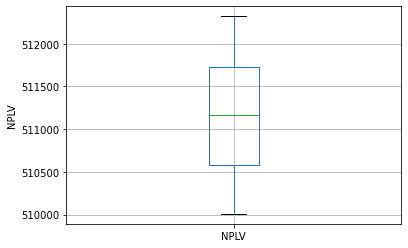

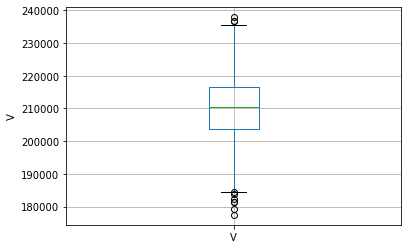

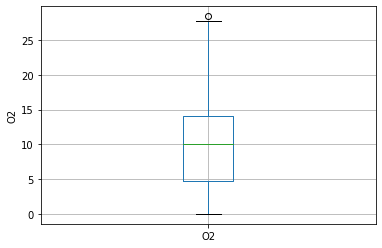

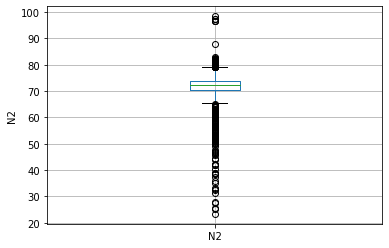

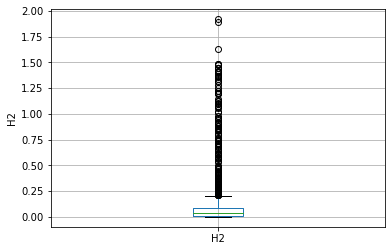

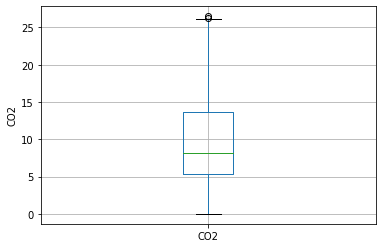

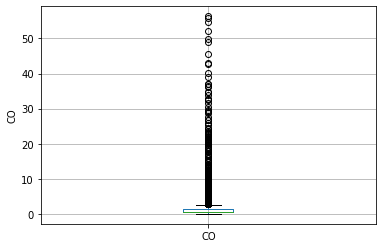

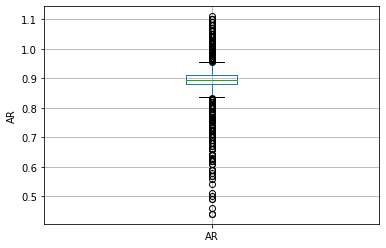

In [75]:
data_gas_SUM_data=data_gas_SUM[['V', 'O2', 'N2', 'H2','CO2','CO','AR']]
for i in data_gas_SUM:
    plt.figure()
    plt.ylabel(i)
    data_gas_SUM.boxplot(i)

In [76]:
data_gas_SUM.drop(['N2', 'H2', 'AR', 'CO'], axis=1, inplace=True)


Получим финальный датасет по газу

In [77]:
data_gas_SUM_model=data_gas_SUM
data_gas_SUM_model

,NPLV,V,O2,CO2
0,510008,216773.484375,9.06,11.210000
1,510009,217732.421875,5.35,15.480000
2,510010,216345.906250,8.70,9.970000
3,510011,218475.359375,12.24,10.420000
4,510012,218051.125000,7.72,15.760000
...,...,...,...,...
2058,512318,208166.593750,0.00,19.100000
2059,512319,207944.078125,12.31,8.840000
2060,512320,206042.953125,10.85,10.930000
2061,512321,205255.031250,0.00,18.559999


# <a id='part6'>2.8. Целевые значения (Датасет target)</a>

In [78]:
df_target_train

,NPLV,TST,C
0,510008,1690,0.060
1,510009,1683,0.097
2,510010,1662,0.091
3,510011,1609,0.410
4,510012,1682,0.120
...,...,...,...
2058,512318,1626,0.145
2059,512319,1643,0.087
2060,512320,1615,0.141
2061,512321,1654,0.270


In [79]:
df_target_train_model=df_target_train.dropna()

In [80]:
df_target_train_model['temperature_target']=df_target_train_model['TST']

<ipython-input-80-5a0fc752c254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_train_model['temperature_target']=df_target_train_model['TST']


In [81]:
df_target_train_model['carbon_target']=df_target_train_model['C']

<ipython-input-81-e4c0f0583fa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_train_model['carbon_target']=df_target_train_model['C']


In [82]:
df_target_train_model.drop(['TST', 'C'], axis=1, inplace=True)

C:\Users\hjhkljhgfd\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
df_target_train_model

,NPLV,temperature_target,carbon_target
0,510008,1690,0.060
1,510009,1683,0.097
2,510010,1662,0.091
3,510011,1609,0.410
4,510012,1682,0.120
...,...,...,...
2058,512318,1626,0.145
2059,512319,1643,0.087
2060,512320,1615,0.141
2061,512321,1654,0.270


### ПОЛУЧИМ ДАТАСЕТ ДЛЯ ОБУЧЕНИЯ

In [84]:
df_train_1=plav_features_train.merge(model_produv_train2, how = 'left', on = 'NPLV')

In [85]:
df_train_2=df_train_1.merge(data_lom_ohe, how = 'left', on = 'NPLV')

In [86]:
df_train_3=df_train_2.merge(model_plav, how = 'left', on = 'NPLV')

In [87]:
df_train_4=df_train_3.merge(model_sip, how = 'left', on = 'NPLV')

In [88]:
df_train_5=df_train_4.merge(df_chugun_model, how = 'left', on = 'NPLV')

In [89]:
df_train_6=df_target_train_model.merge(df_train_5, how = 'left', on = 'NPLV')

In [90]:
df_train_SUM=df_train_6.merge(data_gas_SUM_model, how = 'left', on = 'NPLV')

In [91]:
df_train_SUM.drop('NPLV', axis = 1, inplace = True)

In [92]:
df_train_SUM

,temperature_target,carbon_target,rashod_O2_median_x,poloshenie_furmy_median_x,rashod_O2_median_y,poloshenie_furmy_median_y,rashod_O2_produv_summarnyi,PRODUV_DLIT,VDL_3,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN,NMSYP_Уголь ТО,NMSYP_ФЛЮМАГ,NMSYP_Флюс ФОМИ,Изв_общ,VES,T,SI,MN,S,P,CU,V_x,TI,C,TIME_DELTA,V_y,O2,CO2
0,1690,0.060,832.066456,0.859639,832.066456,0.859639,968595.0,1170.0,0.0,0.0,16700.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,971,11,11,0.170,1625.0,2950,2960,980,14080,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.103,0.084,4.7,256.856035,216773.484375,9.06,11.210000
1,1683,0.097,795.686567,0.838021,795.686567,0.838021,1017089.0,1230.0,0.0,49800.0,22800.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,972,12,12,0.170,1625.0,2930,0,960,19890,264500.0,1419.0,0.68,0.20,0.017,0.087,0.03,0.084,0.096,4.7,256.856035,217732.421875,5.35,15.480000
2,1662,0.091,802.622951,0.800734,802.622951,0.800734,1000536.0,1226.0,0.0,45900.0,22400.0,2000.0,0.0,6000.0,0.0,0.0,0.0,0.0,973,13,13,0.220,1612.0,2990,2960,1050,17070,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.115,0.110,4.7,256.856035,216345.906250,8.70,9.970000
3,1609,0.410,783.461078,1.068085,783.461078,1.068085,846278.0,1058.0,0.0,0.0,29200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,974,14,14,0.100,1612.0,3620,0,980,22700,264000.0,1401.0,0.48,0.27,0.018,0.091,0.02,0.112,0.110,4.7,256.856035,218475.359375,12.24,10.420000
4,1682,0.120,783.510638,0.800000,783.510638,0.800000,1001355.0,1239.0,0.0,0.0,6100.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,975,15,15,0.045,1650.0,2930,3010,1000,21600,263300.0,1422.0,0.47,0.23,0.018,0.096,0.03,0.083,0.070,4.7,256.856035,218051.125000,7.72,15.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,1626,0.145,820.000000,0.900000,820.000000,0.900000,1011224.0,1063.0,0.0,0.0,3300.0,3000.0,0.0,11500.0,4100.0,0.0,0.0,0.0,3281,22,56,0.057,1650.0,0,2890,0,14640,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.081,0.060,4.7,256.856035,208166.593750,0.00,19.100000
2131,1643,0.087,844.000000,0.920000,844.000000,0.920000,1033210.0,1108.0,0.0,46400.0,15300.0,5000.0,0.0,9900.0,0.0,0.0,0.0,0.0,3282,23,57,0.057,1650.0,960,2820,0,19210,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.079,0.081,4.7,256.856035,207944.078125,12.31,8.840000
2132,1615,0.141,789.000000,1.080000,789.000000,1.080000,877938.0,1058.0,0.0,41400.0,0.0,5000.0,0.0,0.0,17800.0,0.0,0.0,0.0,3283,24,58,0.440,1625.0,1380,2830,0,19420,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.086,0.066,4.7,256.856035,206042.953125,10.85,10.930000
2133,1654,0.270,723.000000,1.100000,723.000000,1.100000,956368.0,1169.0,0.0,0.0,4200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,3284,25,59,0.440,1625.0,520,2310,0,16100,275800.0,1408.0,0.38,0.27,0.021,0.100,0.03,0.076,0.060,4.7,256.856035,205255.031250,0.00,18.559999


### ПРОВЕРИМ ПРИЗНАКИ НА ВЗАИМНУЮ КОРРЕЛЯЦИЮ

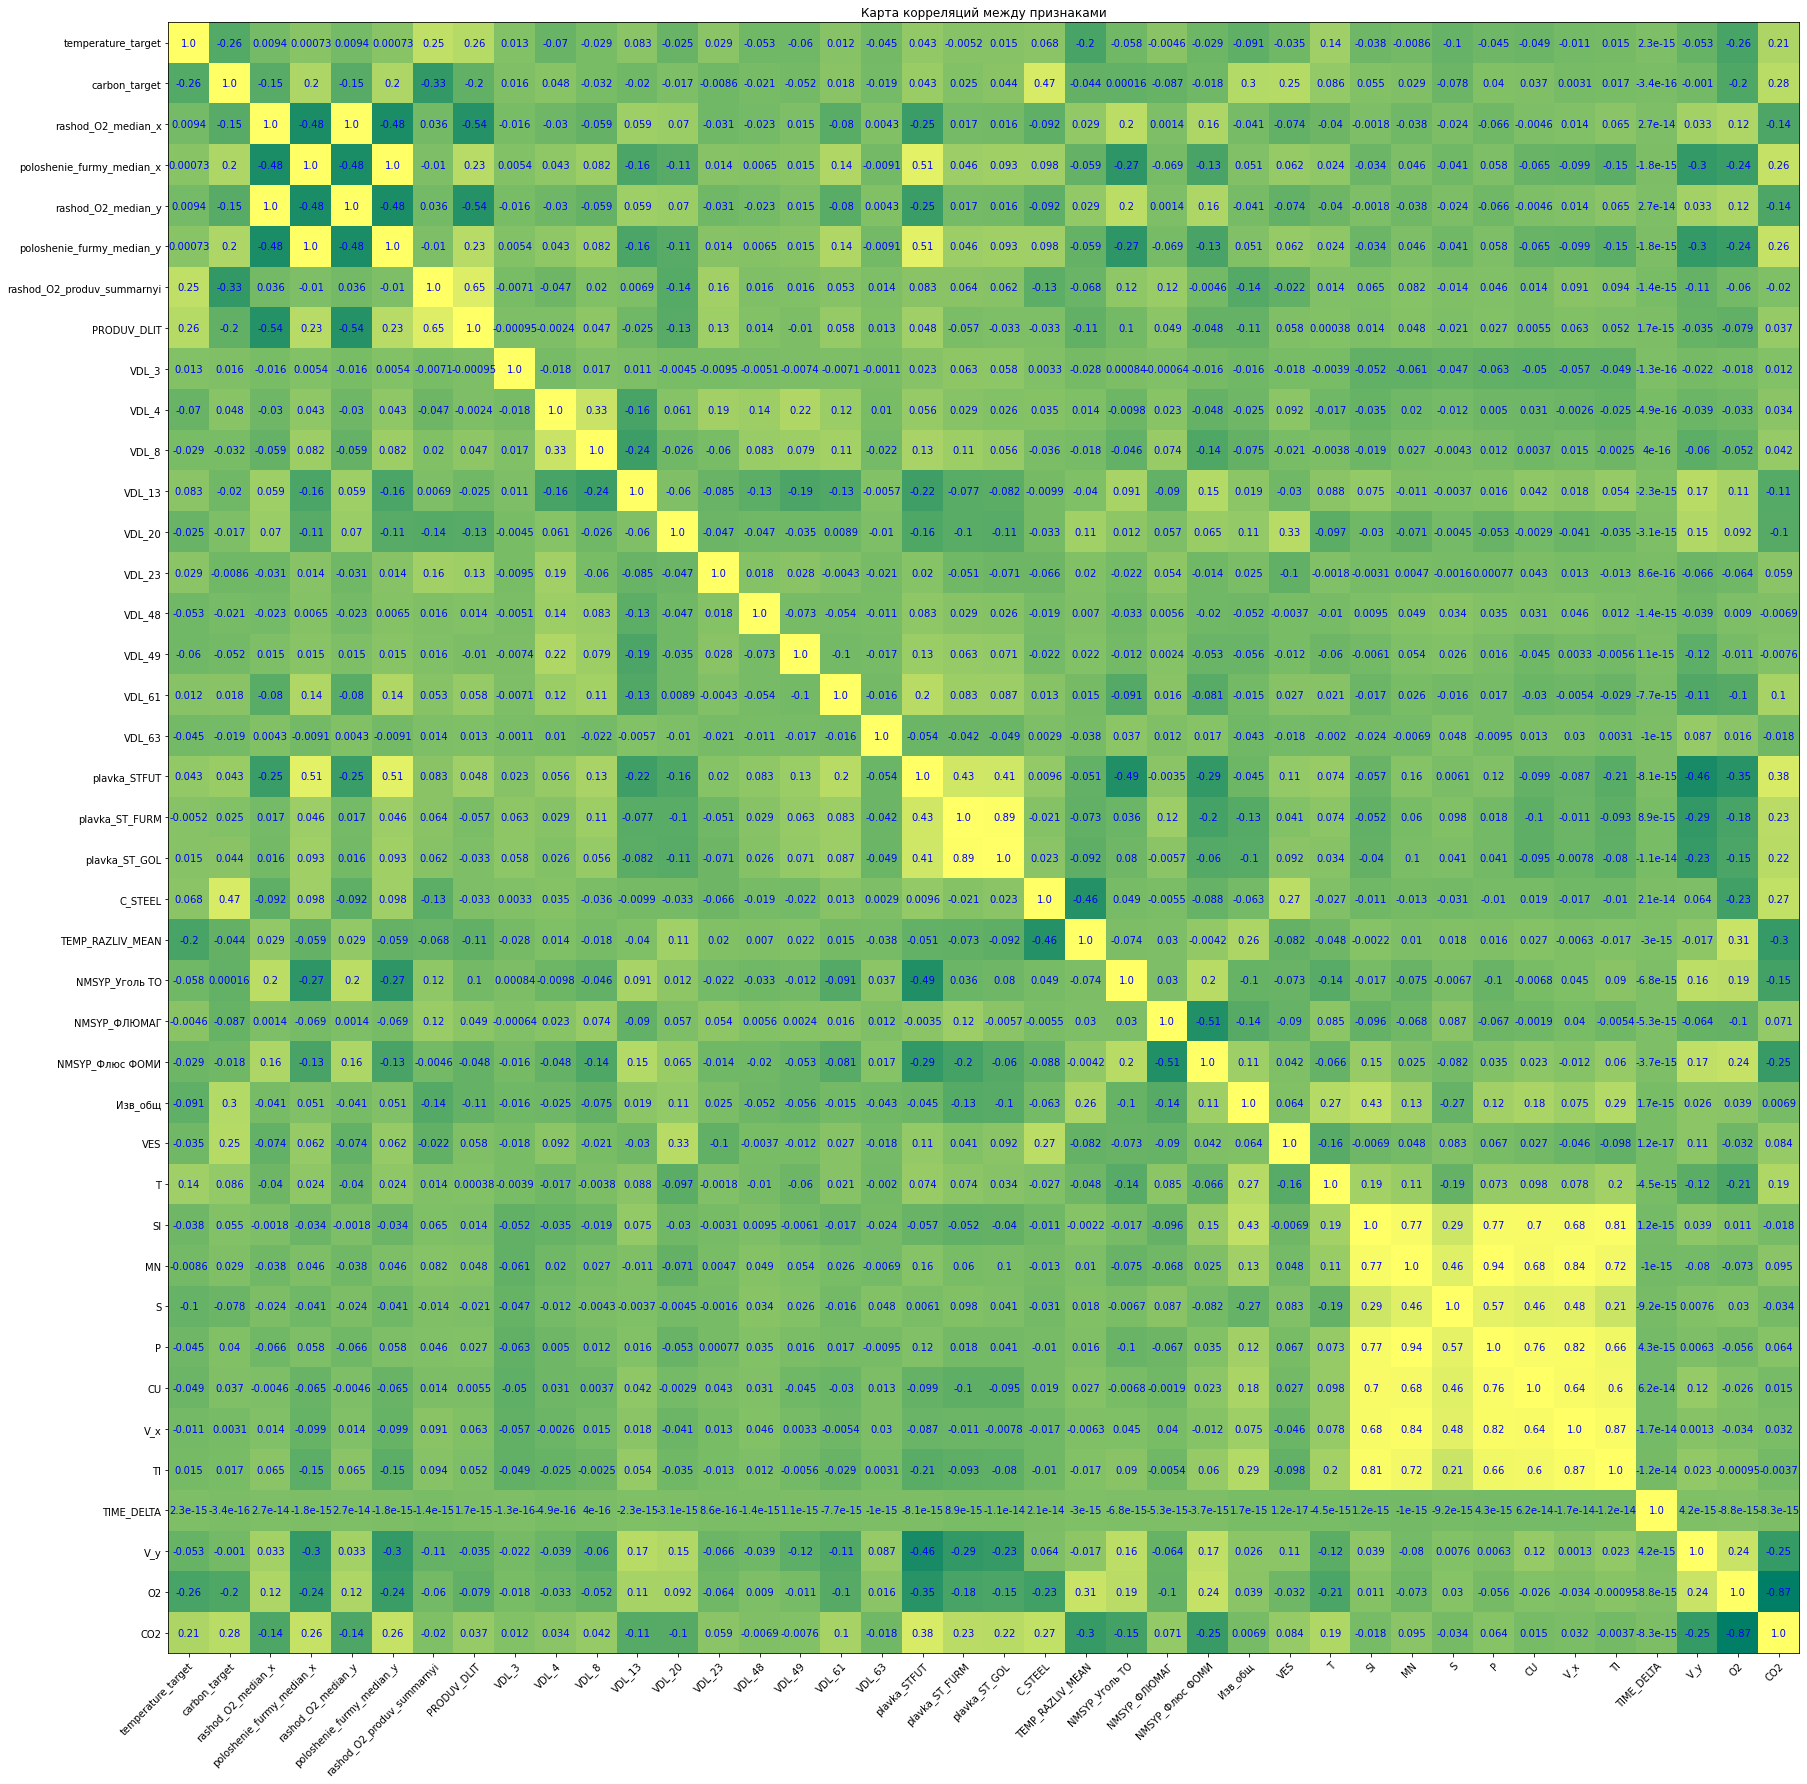

In [93]:
df_train_SUM = df_train_SUM.copy()
corr_heatmap_data = df_train_SUM.corr()

fig, ax = plt.subplots(figsize=(30,30))
ax.set_xticks(np.arange(len(corr_heatmap_data.index)))
ax.set_yticks(np.arange(len(corr_heatmap_data.index)))

ax.set_xticklabels(corr_heatmap_data.index)
ax.set_yticklabels(corr_heatmap_data.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

data = corr_heatmap_data.values

for i in range(len(corr_heatmap_data.index)):
    for j in range(len(corr_heatmap_data.index)):
        text = ax.text(j, i, '{:.2}'.format(data[i, j]),
                       ha="center", va="center", color="b")
        
plt.title('Карта корреляций между признаками')      
im = ax.imshow(corr_heatmap_data.corr(), cmap='summer')

Удалим признаки с высокой взаимной корреляцией

In [94]:
df_train_SUM.drop(['V_x', 'rashod_O2_median_x', 'poloshenie_furmy_median_x', 'P', 'TI', ], axis=1, inplace=True)

In [95]:
df_train_SUM

,temperature_target,carbon_target,rashod_O2_median_y,poloshenie_furmy_median_y,rashod_O2_produv_summarnyi,PRODUV_DLIT,VDL_3,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN,NMSYP_Уголь ТО,NMSYP_ФЛЮМАГ,NMSYP_Флюс ФОМИ,Изв_общ,VES,T,SI,MN,S,CU,C,TIME_DELTA,V_y,O2,CO2
0,1690,0.060,832.066456,0.859639,968595.0,1170.0,0.0,0.0,16700.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,971,11,11,0.170,1625.0,2950,2960,980,14080,263700.0,1396.0,0.44,0.22,0.023,0.03,4.7,256.856035,216773.484375,9.06,11.210000
1,1683,0.097,795.686567,0.838021,1017089.0,1230.0,0.0,49800.0,22800.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,972,12,12,0.170,1625.0,2930,0,960,19890,264500.0,1419.0,0.68,0.20,0.017,0.03,4.7,256.856035,217732.421875,5.35,15.480000
2,1662,0.091,802.622951,0.800734,1000536.0,1226.0,0.0,45900.0,22400.0,2000.0,0.0,6000.0,0.0,0.0,0.0,0.0,973,13,13,0.220,1612.0,2990,2960,1050,17070,263800.0,1384.0,0.56,0.26,0.017,0.03,4.7,256.856035,216345.906250,8.70,9.970000
3,1609,0.410,783.461078,1.068085,846278.0,1058.0,0.0,0.0,29200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,974,14,14,0.100,1612.0,3620,0,980,22700,264000.0,1401.0,0.48,0.27,0.018,0.02,4.7,256.856035,218475.359375,12.24,10.420000
4,1682,0.120,783.510638,0.800000,1001355.0,1239.0,0.0,0.0,6100.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,975,15,15,0.045,1650.0,2930,3010,1000,21600,263300.0,1422.0,0.47,0.23,0.018,0.03,4.7,256.856035,218051.125000,7.72,15.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,1626,0.145,820.000000,0.900000,1011224.0,1063.0,0.0,0.0,3300.0,3000.0,0.0,11500.0,4100.0,0.0,0.0,0.0,3281,22,56,0.057,1650.0,0,2890,0,14640,267200.0,1415.0,0.38,0.28,0.019,0.02,4.7,256.856035,208166.593750,0.00,19.100000
2131,1643,0.087,844.000000,0.920000,1033210.0,1108.0,0.0,46400.0,15300.0,5000.0,0.0,9900.0,0.0,0.0,0.0,0.0,3282,23,57,0.057,1650.0,960,2820,0,19210,266800.0,1405.0,0.50,0.30,0.017,0.02,4.7,256.856035,207944.078125,12.31,8.840000
2132,1615,0.141,789.000000,1.080000,877938.0,1058.0,0.0,41400.0,0.0,5000.0,0.0,0.0,17800.0,0.0,0.0,0.0,3283,24,58,0.440,1625.0,1380,2830,0,19420,276100.0,1398.0,0.61,0.31,0.025,0.03,4.7,256.856035,206042.953125,10.85,10.930000
2133,1654,0.270,723.000000,1.100000,956368.0,1169.0,0.0,0.0,4200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,3284,25,59,0.440,1625.0,520,2310,0,16100,275800.0,1408.0,0.38,0.27,0.021,0.03,4.7,256.856035,205255.031250,0.00,18.559999


In [96]:
df_train_FINAL=df_train_SUM

In [97]:
#Переименуем столбы
df_train_FINAL.rename(columns={'rashod_O2_median_y': 'rashod_O2_median', 
                               'poloshenie_furmy_median_y': 'poloshenie_furmy_median',
                      'NMSYP_Уголь ТО': 'Уголь ТО', 'NMSYP_ФЛЮМАГ': 'ФЛЮМАГ',
                              'VES': 'VES_CHUGUN',  'T': 'T_CHUGUN', 'C':'C_CHUGUN', 'NMSYP_Флюс ФОМИ':'Флюс ФОМИ',
                              'V_y':'V_GAS'}, inplace=True)

In [98]:
df_train_FINAL

,temperature_target,carbon_target,rashod_O2_median,poloshenie_furmy_median,rashod_O2_produv_summarnyi,PRODUV_DLIT,VDL_3,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN,Уголь ТО,ФЛЮМАГ,Флюс ФОМИ,Изв_общ,VES_CHUGUN,T_CHUGUN,SI,MN,S,CU,C_CHUGUN,TIME_DELTA,V_GAS,O2,CO2
0,1690,0.060,832.066456,0.859639,968595.0,1170.0,0.0,0.0,16700.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,971,11,11,0.170,1625.0,2950,2960,980,14080,263700.0,1396.0,0.44,0.22,0.023,0.03,4.7,256.856035,216773.484375,9.06,11.210000
1,1683,0.097,795.686567,0.838021,1017089.0,1230.0,0.0,49800.0,22800.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,972,12,12,0.170,1625.0,2930,0,960,19890,264500.0,1419.0,0.68,0.20,0.017,0.03,4.7,256.856035,217732.421875,5.35,15.480000
2,1662,0.091,802.622951,0.800734,1000536.0,1226.0,0.0,45900.0,22400.0,2000.0,0.0,6000.0,0.0,0.0,0.0,0.0,973,13,13,0.220,1612.0,2990,2960,1050,17070,263800.0,1384.0,0.56,0.26,0.017,0.03,4.7,256.856035,216345.906250,8.70,9.970000
3,1609,0.410,783.461078,1.068085,846278.0,1058.0,0.0,0.0,29200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,974,14,14,0.100,1612.0,3620,0,980,22700,264000.0,1401.0,0.48,0.27,0.018,0.02,4.7,256.856035,218475.359375,12.24,10.420000
4,1682,0.120,783.510638,0.800000,1001355.0,1239.0,0.0,0.0,6100.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,975,15,15,0.045,1650.0,2930,3010,1000,21600,263300.0,1422.0,0.47,0.23,0.018,0.03,4.7,256.856035,218051.125000,7.72,15.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,1626,0.145,820.000000,0.900000,1011224.0,1063.0,0.0,0.0,3300.0,3000.0,0.0,11500.0,4100.0,0.0,0.0,0.0,3281,22,56,0.057,1650.0,0,2890,0,14640,267200.0,1415.0,0.38,0.28,0.019,0.02,4.7,256.856035,208166.593750,0.00,19.100000
2131,1643,0.087,844.000000,0.920000,1033210.0,1108.0,0.0,46400.0,15300.0,5000.0,0.0,9900.0,0.0,0.0,0.0,0.0,3282,23,57,0.057,1650.0,960,2820,0,19210,266800.0,1405.0,0.50,0.30,0.017,0.02,4.7,256.856035,207944.078125,12.31,8.840000
2132,1615,0.141,789.000000,1.080000,877938.0,1058.0,0.0,41400.0,0.0,5000.0,0.0,0.0,17800.0,0.0,0.0,0.0,3283,24,58,0.440,1625.0,1380,2830,0,19420,276100.0,1398.0,0.61,0.31,0.025,0.03,4.7,256.856035,206042.953125,10.85,10.930000
2133,1654,0.270,723.000000,1.100000,956368.0,1169.0,0.0,0.0,4200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,3284,25,59,0.440,1625.0,520,2310,0,16100,275800.0,1408.0,0.38,0.27,0.021,0.03,4.7,256.856035,205255.031250,0.00,18.559999


### Получим тестовую выборку

***Датасет produv***

In [99]:
plav_features_test = df_produv_test.groupby('NPLV').agg(lambda x: x.median()).reset_index()
plav_features_test['rashod_O2_median']=plav_features_test['RAS']
plav_features_test['poloshenie_furmy_median']=plav_features_test['POL']
plav_features_test.drop(['RAS', 'POL'], axis = 1, inplace = True)
display(plav_features_test)

,NPLV,rashod_O2_median,poloshenie_furmy_median
0,512324,274.436214,4.729595
1,512327,276.939577,5.333287
2,512328,271.911184,5.520544
3,512331,302.255466,5.832759
4,512333,333.629630,4.980433
...,...,...,...
775,513369,310.000000,4.300000
776,513370,332.524272,4.435128
777,513371,294.112654,5.855208
778,513372,258.800481,4.045207


***Датасет chronom***

In [100]:
model_chronom_test = df_chronom_test.query('NOP == "Продувка"')
model_chronom_test['VR_KON'] = pd.to_datetime(model_chronom_test['VR_KON'])
model_chronom_test['VR_NACH'] = pd.to_datetime(model_chronom_test['VR_NACH'])
model_chronom_test['PRODUV_DLIT'] = (model_chronom_test['VR_KON'] - model_chronom_test['VR_NACH']).dt.total_seconds()

rashod_O2_produv_test = df_produv_test.merge((df_chronom_test[['NPLV', 'VR_NACH','VR_KON','NOP']].
                    query('NOP == ["Продувка","Додувка на t", "Додувка на C", "Нагрев лома"]')), how = 'left', on = 'NPLV')

rashod_O2_produv_test = rashod_O2_produv_test.query('SEC > VR_NACH and SEC < VR_KON')
rashod_O2_produv_test.drop(['SEC', 'VR_NACH', 'VR_KON', 'NOP', 'POL'], axis = 1, inplace = True)
rashod_O2_produv_test = rashod_O2_produv_test.groupby('NPLV').agg(lambda x: 2*x.sum()).reset_index()
rashod_O2_produv_test['rashod_O2_produv_summarnyi']=rashod_O2_produv_test['RAS']

rashod_O2_produv_test.drop(['RAS'], axis = 1, inplace = True)

model_produv_test = plav_features_test.merge(rashod_O2_produv_test, how = 'left', on = 'NPLV')
model_produv_test2=model_produv_test.merge(model_chronom_test, how = 'left', on= 'NPLV')

model_produv_test2.drop(['Unnamed: 0', 'TYPE_OPER', 'NOP', 'VR_NACH', 'VR_KON', 'O2'], axis=1, inplace = True)
model_produv_test2

<ipython-input-100-7f95e7edb1e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_chronom_test['VR_KON'] = pd.to_datetime(model_chronom_test['VR_KON'])
<ipython-input-100-7f95e7edb1e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_chronom_test['VR_NACH'] = pd.to_datetime(model_chronom_test['VR_NACH'])
<ipython-input-100-7f95e7edb1e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,NPLV,rashod_O2_median,poloshenie_furmy_median,rashod_O2_produv_summarnyi,PRODUV_DLIT
0,512324,274.436214,4.729595,1054094.0,1263.0
1,512327,276.939577,5.333287,913518.0,1074.0
2,512328,271.911184,5.520544,958730.0,1122.0
3,512331,302.255466,5.832759,953700.0,1103.0
4,512333,333.629630,4.980433,927144.0,1096.0
...,...,...,...,...,...
775,513369,310.000000,4.300000,1306704.0,1213.0
776,513370,332.524272,4.435128,1233362.0,1161.0
777,513371,294.112654,5.855208,1209170.0,1181.0
778,513372,258.800481,4.045207,1033866.0,1335.0


***Датасет lom***

In [101]:
data_lom_ohe_test = df_lom_test
col_ohe_test = pd.get_dummies(df_lom_test['VDL'], prefix = 'VDL')
data_lom_ohe_test = pd.concat((data_lom_ohe_test, col_ohe_test), axis=1).drop(['VDL'], axis=1)


vdl_list_test = data_lom_ohe_test.columns.tolist()[3:]
for col in vdl_list_test:
    data_lom_ohe_test[col] = data_lom_ohe_test[col]*data_lom_ohe_test['VES']
    
data_lom_ohe_test.drop(['NML', 'VES'], axis=1, inplace = True)

data_lom_ohe_test = data_lom_ohe_test.groupby('NPLV').agg(lambda x: x.sum()).reset_index()
data_lom_ohe_test

,NPLV,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63
0,512324,26040,17660,2000,0,0,0,0,0,0
1,512327,49400,10600,3000,0,8000,0,0,0,0
2,512328,65700,0,6000,0,0,0,0,0,0
3,512331,36000,32500,2000,0,0,0,0,0,0
4,512333,40300,62200,2000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
775,513369,52700,2300,6000,0,0,0,0,0,0
776,513370,52700,0,3000,0,0,6600,0,0,0
777,513371,60100,0,6000,0,2000,0,0,0,0
778,513372,59600,3100,3000,0,0,500,0,0,0


***Датасет plavki***

In [102]:
df_plavki_test_clean = df_plavki_test.drop(['plavka_VR_NACH', 'plavka_VR_KON', 
                                              'plavka_TIPE_FUR', 'plavka_TIPE_GOL'], axis=1)

steel_mark_test = pd.read_csv("steel_mark.csv")
c_steel_test = pd.DataFrame(df_plavki_test_clean['plavka_NMZ'].unique().tolist(), columns = ['plavka_NMZ'])

steel_mark = pd.read_csv("steel_mark.csv")
c_steel_test = c_steel.merge(steel_mark_test, how = 'left', on = 'plavka_NMZ')


model_plav_test = df_plavki_test_clean.merge(c_steel_test, how = 'left', on = 'plavka_NMZ')
model_plav_test.drop(['plavka_NMZ', 'C_STEEL_x', 'ISTOCHNIK_x', 'ISTOCHNIK_y'], axis=1, inplace = True)
model_plav_test

,NPLV,plavka_NAPR_ZAD,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL_y
0,512324,Изл,2,2,2,0.22
1,512327,МНЛС,5,5,5,NaN
2,512328,Изл,6,6,6,0.22
3,512331,Изл,9,9,9,0.29
4,512333,МНЛС,11,11,11,0.09
...,...,...,...,...,...,...
775,513369,МНЛЗ,1047,2,2,NaN
776,513370,МНЛЗ,1048,3,3,NaN
777,513371,МНЛЗ,1049,4,4,NaN
778,513372,МНЛЗ,1050,5,5,NaN


In [103]:
for i in range(len(model_plav_test)):
    if model_plav_test.loc[i, 'plavka_NAPR_ZAD'] == "МНЛС": 
        model_plav_test.loc[i, 'TEMP_RAZLIV_MEAN'] = 1650
    if model_plav_test.loc[i, 'plavka_NAPR_ZAD'] == "МНЛЗ": 
        model_plav_test.loc[i, 'TEMP_RAZLIV_MEAN'] = 1625
    if model_plav_test.loc[i, 'plavka_NAPR_ZAD'] == "Изл":
        model_plav_test.loc[i, 'TEMP_RAZLIV_MEAN'] = 1612

In [104]:
model_plav_test.drop('plavka_NAPR_ZAD', axis=1, inplace=True)

***Датасет sip***

In [105]:
df_sip_test

,NPLV,VDSYP,NMSYP,VSSYP,DAT_OTD
0,512324,408,изв_ЦОИ,3020,2021-05-05 17:38:59
1,512324,442,ФЛЮМАГ,1670,2021-05-05 17:42:07
2,512324,408,изв_ЦОИ,2810,2021-05-05 17:42:07
3,512324,346,Уголь ТО,140,2021-05-05 17:43:39
4,512324,346,Уголь ТО,70,2021-05-05 17:43:49
...,...,...,...,...,...
10457,513374,346,Уголь ТО,630,2021-06-29 22:44:40
10458,513374,346,Уголь ТО,2310,2021-06-29 22:46:17
10459,513374,408,изв_ЦОИ,10010,2021-06-29 22:46:23
10460,513374,346,Уголь ТО,670,2021-06-29 22:48:22


In [106]:
df_sip_test['NMSYP'].unique()

array(['изв_ЦОИ', 'ФЛЮМАГ', 'Уголь ТО', 'кокс_25_40', 'агл_офл_с',
       'долом_сыр', 'изв_отсев', 'Флюс ФОМИ'], dtype=object)

In [107]:
data_sip_ohe_test = df_sip_test
df_sip_test['NMSYP'].unique().tolist()

col_ohe_sip_test = pd.get_dummies(df_sip_test['NMSYP'], prefix = 'NMSYP')
data_sip_ohe_test = pd.concat((data_sip_ohe_test, col_ohe_sip_test), axis=1).drop(['NMSYP'], axis=1)

vdsyp_list_test = data_sip_ohe_test.columns.tolist()[4:]

for col in vdsyp_list_test:
    data_sip_ohe_test[col] = data_sip_ohe_test[col]*data_sip_ohe_test['VSSYP']
    
data_sip_ohe_test.drop(['VDSYP', 'VSSYP', 'DAT_OTD'], axis=1, inplace = True)

data_sip_ohe_test = data_sip_ohe_test.groupby('NPLV').agg(lambda x: x.sum()).reset_index()

data_sip_ohe_test['Изв_общ']=data_sip_ohe_test['NMSYP_изв_отсев']+data_sip_ohe_test['NMSYP_изв_ЦОИ']

data_sip_ohe_test['NMSYP_Уголь ТО']=data_sip_ohe_test['NMSYP_Уголь ТО']+ \
        data_sip_ohe_test['NMSYP_агл_офл_с']+data_sip_ohe_test['NMSYP_кокс_25_40']

data_sip_ohe_test.drop(['NMSYP_изв_отсев', 'NMSYP_изв_ЦОИ'], axis=1, inplace = True)

data_sip_ohe_test.drop(['NMSYP_долом_сыр', 'NMSYP_кокс_25_40', 'NMSYP_агл_офл_с'] , axis=1, inplace = True)

data_sip_ohe_test

,NPLV,NMSYP_Уголь ТО,NMSYP_ФЛЮМАГ,NMSYP_Флюс ФОМИ,Изв_общ
0,512324,1310,1670,0,13960
1,512327,50,0,0,15290
2,512328,1400,0,0,20010
3,512331,930,0,0,14060
4,512333,960,0,0,20100
...,...,...,...,...,...
775,513369,2010,2980,0,13990
776,513370,2190,2750,0,14030
777,513371,2030,2920,0,12380
778,513372,0,2920,0,12010


***Датасет chugun***

In [108]:
model_time_start_produv_test = df_chronom_test.query('NOP == "Продувка"')
model_time_chugun_test = df_chugun_test[['NPLV','DATA_ZAMERA']]
model_time_delta_test = model_time_start_produv_test.merge(model_time_chugun_test, how = 'left', on = 'NPLV')
model_time_delta_test.drop(['Unnamed: 0','TYPE_OPER','NOP','O2'], axis = 1,inplace = True)
model_time_delta_test['VR_NACH'] = pd.to_datetime(model_time_delta_test['VR_NACH'])
model_time_delta_test['DATA_ZAMERA'] = pd.to_datetime(model_time_delta_test['DATA_ZAMERA'])
model_time_delta_test['TIME_DELTA'] = (model_time_delta_test['VR_NACH'] - model_time_delta_test['DATA_ZAMERA']).dt.total_seconds()

df_chugun_test['C']=df_chugun_test['NI']
df_chugun_test['C']='4.7'

df_chugun_model_test=df_chugun_test.merge(model_time_delta_test, how = 'left', on = 'NPLV')

df_chugun_model_test.drop(['DATA_ZAMERA_x', 'VR_NACH', 'VR_KON', 'DATA_ZAMERA_y'], axis=1, inplace=True)

df_chugun_model_test.drop(['CR', 'NI',], axis=1, inplace=True)

df_chugun_model_test['TIME_DELTA']=df_chugun_model_test['TIME_DELTA'].mean()

In [109]:
df_chugun_model_test

,NPLV,VES,T,SI,MN,S,P,CU,V,TI,C,TIME_DELTA
0,512324,240100.0,1355.0,0.46,0.33,0.027,0.079,0.02,0.048,0.030,4.7,2543.808974
1,512327,266400.0,1390.0,0.30,0.33,0.032,0.099,0.00,0.050,0.024,4.7,2543.808974
2,512328,270200.0,1373.0,0.00,0.00,0.000,0.000,0.00,0.000,0.000,4.7,2543.808974
3,512331,266700.0,1383.0,0.54,0.39,0.028,0.115,0.03,0.059,0.042,4.7,2543.808974
4,512333,267400.0,1387.0,0.00,0.00,0.000,0.000,0.00,0.000,0.000,4.7,2543.808974
...,...,...,...,...,...,...,...,...,...,...,...,...
775,513369,280800.0,1324.0,0.35,0.29,0.035,0.096,0.02,0.080,0.062,4.7,2543.808974
776,513370,280600.0,1389.0,0.39,0.31,0.024,0.097,0.02,0.093,0.074,4.7,2543.808974
777,513371,279700.0,1332.0,0.30,0.27,0.031,0.099,0.02,0.066,0.036,4.7,2543.808974
778,513372,279700.0,1378.0,0.43,0.33,0.026,0.113,0.02,0.095,0.070,4.7,2543.808974


***Датасет gas***

In [110]:
data_gas_SUM_test = df_gas_test[['NPLV','V', 'O2', 'N2', 'H2','CO2','CO',
                             'AR']].groupby('NPLV').agg(lambda x: x.median()).reset_index()

data_gas_SUM_test.drop(['N2', 'H2', 'AR', 'CO'], axis=1, inplace=True)

In [111]:
data_gas_SUM_test

,NPLV,V,O2,CO2
0,512324,212894.515625,11.98,5.370000
1,512327,233432.531250,10.26,8.840000
2,512328,234718.109375,12.77,8.860000
3,512331,222569.171875,0.00,30.120001
4,512333,219426.875000,0.62,21.719999
...,...,...,...,...
775,513369,223813.750000,6.04,13.080000
776,513370,224020.500000,0.00,20.790001
777,513371,223192.328125,9.41,8.270000
778,513372,219848.437500,0.63,15.070000


***Получим финальный тестовый датасет***

In [112]:
df_test_SUM = plav_features_test.merge(model_produv_test2, how = 'left', on = 'NPLV').\
merge(data_lom_ohe_test, how = 'left', on = 'NPLV').\
merge(model_plav_test, how = 'left', on = 'NPLV').\
merge(data_sip_ohe_test, how = 'left', on = 'NPLV').\
merge(df_chugun_model_test, how = 'left', on = 'NPLV').\
merge(data_gas_SUM_test, how = 'left', on = 'NPLV') 


df_train_1=plav_features_train.merge(model_produv_train2, how = 'left', on = 'NPLV')
df_train_2=df_train_1.merge(data_lom_ohe, how = 'left', on = 'NPLV')
df_train_3=df_train_2.merge(model_plav, how = 'left', on = 'NPLV')
df_train_4=df_train_3.merge(model_sip, how = 'left', on = 'NPLV')
df_train_5=df_train_4.merge(df_chugun_model, how = 'left', on = 'NPLV')
df_train_6=df_target_train_model.merge(df_train_5, how = 'left', on = 'NPLV')
df_train_SUM=df_train_6.merge(data_gas_SUM_model, how = 'left', on = 'NPLV')
df_train_SUM.drop('NPLV', axis = 1, inplace = True)
df_train_SUM.drop(['V_x', 'rashod_O2_median_x', 'poloshenie_furmy_median_x', 'P', 'TI', ], axis=1, inplace=True)
df_train_SUM

In [154]:
df_test_SUM

,rashod_O2_median,poloshenie_furmy_median,rashod_O2_produv_summarnyi,PRODUV_DLIT,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN,Уголь ТО,ФЛЮМАГ,Флюс ФОМИ,Изв_общ,VES_CHUGUN,T_CHUGUN,SI,MN,S,CU,C_CHUGUN,TIME_DELTA,V_GAS,O2,CO2
0,274.436214,4.729595,1054094.0,1263.0,26040,17660,2000,0,0,0,0,0,0,2,2,2,0.22,1612.0,1310,1670,0,13960,240100.0,1355.0,0.46,0.33,0.027,0.02,4.7,2543.808974,212894.515625,11.98,5.370000
1,276.939577,5.333287,913518.0,1074.0,49400,10600,3000,0,8000,0,0,0,0,5,5,5,NaN,1650.0,50,0,0,15290,266400.0,1390.0,0.30,0.33,0.032,0.00,4.7,2543.808974,233432.531250,10.26,8.840000
2,271.911184,5.520544,958730.0,1122.0,65700,0,6000,0,0,0,0,0,0,6,6,6,0.22,1612.0,1400,0,0,20010,270200.0,1373.0,0.00,0.00,0.000,0.00,4.7,2543.808974,234718.109375,12.77,8.860000
3,302.255466,5.832759,953700.0,1103.0,36000,32500,2000,0,0,0,0,0,0,9,9,9,0.29,1612.0,930,0,0,14060,266700.0,1383.0,0.54,0.39,0.028,0.03,4.7,2543.808974,222569.171875,0.00,30.120001
4,333.629630,4.980433,927144.0,1096.0,40300,62200,2000,0,0,0,0,0,0,11,11,11,0.09,1650.0,960,0,0,20100,267400.0,1387.0,0.00,0.00,0.000,0.00,4.7,2543.808974,219426.875000,0.62,21.719999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,310.000000,4.300000,1306704.0,1213.0,52700,2300,6000,0,0,0,0,0,0,1047,2,2,NaN,1625.0,2010,2980,0,13990,280800.0,1324.0,0.35,0.29,0.035,0.02,4.7,2543.808974,223813.750000,6.04,13.080000
776,332.524272,4.435128,1233362.0,1161.0,52700,0,3000,0,0,6600,0,0,0,1048,3,3,NaN,1625.0,2190,2750,0,14030,280600.0,1389.0,0.39,0.31,0.024,0.02,4.7,2543.808974,224020.500000,0.00,20.790001
777,294.112654,5.855208,1209170.0,1181.0,60100,0,6000,0,2000,0,0,0,0,1049,4,4,NaN,1625.0,2030,2920,0,12380,279700.0,1332.0,0.30,0.27,0.031,0.02,4.7,2543.808974,223192.328125,9.41,8.270000
778,258.800481,4.045207,1033866.0,1335.0,59600,3100,3000,0,0,500,0,0,0,1050,5,5,NaN,1625.0,0,2920,0,12010,279700.0,1378.0,0.43,0.33,0.026,0.02,4.7,2543.808974,219848.437500,0.63,15.070000


In [155]:
df_test_SUM.drop(['rashod_O2_median_x', 'poloshenie_furmy_median_x', 'P', 'TI', 'V_x', 'NPLV'], axis=1, inplace=True)

In [156]:
#Переименуем столбы
df_test_SUM.rename(columns={'rashod_O2_median_y': 'rashod_O2_median', 
                               'poloshenie_furmy_median_y': 'poloshenie_furmy_median',
                      'NMSYP_Уголь ТО': 'Уголь ТО', 'NMSYP_ФЛЮМАГ': 'ФЛЮМАГ', 'C_STEEL_y':'C_STEEL',
                              'VES': 'VES_CHUGUN',  'T': 'T_CHUGUN', 'C':'C_CHUGUN', 'NMSYP_Флюс ФОМИ':'Флюс ФОМИ',
                              'V_y':'V_GAS'}, inplace=True)

In [157]:
df_test_SUM

,rashod_O2_median,rashod_O2_produv_summarnyi,PRODUV_DLIT,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN,Уголь ТО,ФЛЮМАГ,Флюс ФОМИ,Изв_общ,VES_CHUGUN,T_CHUGUN,SI,MN,S,CU,C_CHUGUN,TIME_DELTA,V_GAS,O2,CO2
0,274.436214,1054094.0,1263.0,26040,17660,2000,0,0,0,0,0,0,2,2,2,0.22,1612.0,1310,1670,0,13960,240100.0,1355.0,0.46,0.33,0.027,0.02,4.7,2543.808974,212894.515625,11.98,5.370000
1,276.939577,913518.0,1074.0,49400,10600,3000,0,8000,0,0,0,0,5,5,5,NaN,1650.0,50,0,0,15290,266400.0,1390.0,0.30,0.33,0.032,0.00,4.7,2543.808974,233432.531250,10.26,8.840000
2,271.911184,958730.0,1122.0,65700,0,6000,0,0,0,0,0,0,6,6,6,0.22,1612.0,1400,0,0,20010,270200.0,1373.0,0.00,0.00,0.000,0.00,4.7,2543.808974,234718.109375,12.77,8.860000
3,302.255466,953700.0,1103.0,36000,32500,2000,0,0,0,0,0,0,9,9,9,0.29,1612.0,930,0,0,14060,266700.0,1383.0,0.54,0.39,0.028,0.03,4.7,2543.808974,222569.171875,0.00,30.120001
4,333.629630,927144.0,1096.0,40300,62200,2000,0,0,0,0,0,0,11,11,11,0.09,1650.0,960,0,0,20100,267400.0,1387.0,0.00,0.00,0.000,0.00,4.7,2543.808974,219426.875000,0.62,21.719999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,310.000000,1306704.0,1213.0,52700,2300,6000,0,0,0,0,0,0,1047,2,2,NaN,1625.0,2010,2980,0,13990,280800.0,1324.0,0.35,0.29,0.035,0.02,4.7,2543.808974,223813.750000,6.04,13.080000
776,332.524272,1233362.0,1161.0,52700,0,3000,0,0,6600,0,0,0,1048,3,3,NaN,1625.0,2190,2750,0,14030,280600.0,1389.0,0.39,0.31,0.024,0.02,4.7,2543.808974,224020.500000,0.00,20.790001
777,294.112654,1209170.0,1181.0,60100,0,6000,0,2000,0,0,0,0,1049,4,4,NaN,1625.0,2030,2920,0,12380,279700.0,1332.0,0.30,0.27,0.031,0.02,4.7,2543.808974,223192.328125,9.41,8.270000
778,258.800481,1033866.0,1335.0,59600,3100,3000,0,0,500,0,0,0,1050,5,5,NaN,1625.0,0,2920,0,12010,279700.0,1378.0,0.43,0.33,0.026,0.02,4.7,2543.808974,219848.437500,0.63,15.070000


In [158]:
df_test_SUM.columns

Index(['rashod_O2_median', 'rashod_O2_produv_summarnyi', 'PRODUV_DLIT',
       'VDL_4', 'VDL_8', 'VDL_13', 'VDL_20', 'VDL_23', 'VDL_48', 'VDL_49',
       'VDL_61', 'VDL_63', 'plavka_STFUT', 'plavka_ST_FURM', 'plavka_ST_GOL',
       'C_STEEL', 'TEMP_RAZLIV_MEAN', 'Уголь ТО', 'ФЛЮМАГ', 'Флюс ФОМИ',
       'Изв_общ', 'VES_CHUGUN', 'T_CHUGUN', 'SI', 'MN', 'S', 'CU', 'C_CHUGUN',
       'TIME_DELTA', 'V_GAS', 'O2', 'CO2'],
      dtype='object')

In [159]:
df_train_FINAL.columns

Index(['temperature_target', 'carbon_target', 'rashod_O2_median',
       'poloshenie_furmy_median', 'rashod_O2_produv_summarnyi', 'PRODUV_DLIT',
       'VDL_3', 'VDL_4', 'VDL_8', 'VDL_13', 'VDL_20', 'VDL_23', 'VDL_48',
       'VDL_49', 'VDL_61', 'VDL_63', 'plavka_STFUT', 'plavka_ST_FURM',
       'plavka_ST_GOL', 'C_STEEL', 'TEMP_RAZLIV_MEAN', 'Уголь ТО', 'ФЛЮМАГ',
       'Флюс ФОМИ', 'Изв_общ', 'VES_CHUGUN', 'T_CHUGUN', 'SI', 'MN', 'S', 'CU',
       'C_CHUGUN', 'TIME_DELTA', 'V_GAS', 'O2', 'CO2'],
      dtype='object')

Сохраним полученные датасеты

In [160]:
df_test_SUM.to_csv("df_test_SUM.csv", index=False)

In [161]:
df_train_FINAL.to_csv("df_train_FINAL.csv", index=False)

# <a id='part6'>3. ПОСТРОЕНИЕ МОДЕЛЕЙ</a>

## Предскажем содержание углерода

In [162]:
r=42

In [165]:
features_train=df_train_FINAL.drop(['carbon_target', 'temperature_target', 'VDL_3', 'poloshenie_furmy_median'], axis=1) # определим признаки
target_train_C=df_train_FINAL[['carbon_target']] # определим целевой признак_1
target_train_t=df_train_FINAL[['temperature_target']] # определим целевой признак_2
features_test=df_test_SUM
display(features_train)
display(features_test)

,rashod_O2_median,rashod_O2_produv_summarnyi,PRODUV_DLIT,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN,Уголь ТО,ФЛЮМАГ,Флюс ФОМИ,Изв_общ,VES_CHUGUN,T_CHUGUN,SI,MN,S,CU,C_CHUGUN,TIME_DELTA,V_GAS,O2,CO2
0,832.066456,968595.0,1170.0,0.0,16700.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,971,11,11,0.170,1625.0,2950,2960,980,14080,263700.0,1396.0,0.44,0.22,0.023,0.03,4.7,256.856035,216773.484375,9.06,11.210000
1,795.686567,1017089.0,1230.0,49800.0,22800.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,972,12,12,0.170,1625.0,2930,0,960,19890,264500.0,1419.0,0.68,0.20,0.017,0.03,4.7,256.856035,217732.421875,5.35,15.480000
2,802.622951,1000536.0,1226.0,45900.0,22400.0,2000.0,0.0,6000.0,0.0,0.0,0.0,0.0,973,13,13,0.220,1612.0,2990,2960,1050,17070,263800.0,1384.0,0.56,0.26,0.017,0.03,4.7,256.856035,216345.906250,8.70,9.970000
3,783.461078,846278.0,1058.0,0.0,29200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,974,14,14,0.100,1612.0,3620,0,980,22700,264000.0,1401.0,0.48,0.27,0.018,0.02,4.7,256.856035,218475.359375,12.24,10.420000
4,783.510638,1001355.0,1239.0,0.0,6100.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,975,15,15,0.045,1650.0,2930,3010,1000,21600,263300.0,1422.0,0.47,0.23,0.018,0.03,4.7,256.856035,218051.125000,7.72,15.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,820.000000,1011224.0,1063.0,0.0,3300.0,3000.0,0.0,11500.0,4100.0,0.0,0.0,0.0,3281,22,56,0.057,1650.0,0,2890,0,14640,267200.0,1415.0,0.38,0.28,0.019,0.02,4.7,256.856035,208166.593750,0.00,19.100000
2131,844.000000,1033210.0,1108.0,46400.0,15300.0,5000.0,0.0,9900.0,0.0,0.0,0.0,0.0,3282,23,57,0.057,1650.0,960,2820,0,19210,266800.0,1405.0,0.50,0.30,0.017,0.02,4.7,256.856035,207944.078125,12.31,8.840000
2132,789.000000,877938.0,1058.0,41400.0,0.0,5000.0,0.0,0.0,17800.0,0.0,0.0,0.0,3283,24,58,0.440,1625.0,1380,2830,0,19420,276100.0,1398.0,0.61,0.31,0.025,0.03,4.7,256.856035,206042.953125,10.85,10.930000
2133,723.000000,956368.0,1169.0,0.0,4200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,3284,25,59,0.440,1625.0,520,2310,0,16100,275800.0,1408.0,0.38,0.27,0.021,0.03,4.7,256.856035,205255.031250,0.00,18.559999


,rashod_O2_median,rashod_O2_produv_summarnyi,PRODUV_DLIT,VDL_4,VDL_8,VDL_13,VDL_20,VDL_23,VDL_48,VDL_49,VDL_61,VDL_63,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,C_STEEL,TEMP_RAZLIV_MEAN,Уголь ТО,ФЛЮМАГ,Флюс ФОМИ,Изв_общ,VES_CHUGUN,T_CHUGUN,SI,MN,S,CU,C_CHUGUN,TIME_DELTA,V_GAS,O2,CO2
0,274.436214,1054094.0,1263.0,26040,17660,2000,0,0,0,0,0,0,2,2,2,0.22,1612.0,1310,1670,0,13960,240100.0,1355.0,0.46,0.33,0.027,0.02,4.7,2543.808974,212894.515625,11.98,5.370000
1,276.939577,913518.0,1074.0,49400,10600,3000,0,8000,0,0,0,0,5,5,5,NaN,1650.0,50,0,0,15290,266400.0,1390.0,0.30,0.33,0.032,0.00,4.7,2543.808974,233432.531250,10.26,8.840000
2,271.911184,958730.0,1122.0,65700,0,6000,0,0,0,0,0,0,6,6,6,0.22,1612.0,1400,0,0,20010,270200.0,1373.0,0.00,0.00,0.000,0.00,4.7,2543.808974,234718.109375,12.77,8.860000
3,302.255466,953700.0,1103.0,36000,32500,2000,0,0,0,0,0,0,9,9,9,0.29,1612.0,930,0,0,14060,266700.0,1383.0,0.54,0.39,0.028,0.03,4.7,2543.808974,222569.171875,0.00,30.120001
4,333.629630,927144.0,1096.0,40300,62200,2000,0,0,0,0,0,0,11,11,11,0.09,1650.0,960,0,0,20100,267400.0,1387.0,0.00,0.00,0.000,0.00,4.7,2543.808974,219426.875000,0.62,21.719999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,310.000000,1306704.0,1213.0,52700,2300,6000,0,0,0,0,0,0,1047,2,2,NaN,1625.0,2010,2980,0,13990,280800.0,1324.0,0.35,0.29,0.035,0.02,4.7,2543.808974,223813.750000,6.04,13.080000
776,332.524272,1233362.0,1161.0,52700,0,3000,0,0,6600,0,0,0,1048,3,3,NaN,1625.0,2190,2750,0,14030,280600.0,1389.0,0.39,0.31,0.024,0.02,4.7,2543.808974,224020.500000,0.00,20.790001
777,294.112654,1209170.0,1181.0,60100,0,6000,0,2000,0,0,0,0,1049,4,4,NaN,1625.0,2030,2920,0,12380,279700.0,1332.0,0.30,0.27,0.031,0.02,4.7,2543.808974,223192.328125,9.41,8.270000
778,258.800481,1033866.0,1335.0,59600,3100,3000,0,0,500,0,0,0,1050,5,5,NaN,1625.0,0,2920,0,12010,279700.0,1378.0,0.43,0.33,0.026,0.02,4.7,2543.808974,219848.437500,0.63,15.070000


Обучим модель градиентного бустинга для предсказания углерода

In [166]:
model = CatBoostRegressor(loss_function="MAE", learning_rate=0.01, score_function='Cosine', iterations=3000,
                              depth=4, verbose=30, random_state=r)
#features_train=features_train.drop('plavka_STFUT', axis=1, inplace=True)
model.fit(features_train, target_train_C.astype('int'))
predict_train = model.predict(features_train)
predicted_test_carbon=model.predict(features_test)
result_train = mean_absolute_error(target_train_C, predict_train)
print('Лучшее MAE на тренировочных данных', result_train)
Carbon_predict=pd.DataFrame(predicted_test_carbon.tolist())

0:	learn: 0.0009368	total: 3.37ms	remaining: 10.1s
30:	learn: 0.0008963	total: 108ms	remaining: 10.3s
60:	learn: 0.0008877	total: 191ms	remaining: 9.21s
90:	learn: 0.0008831	total: 274ms	remaining: 8.77s
120:	learn: 0.0008831	total: 352ms	remaining: 8.37s
150:	learn: 0.0008784	total: 428ms	remaining: 8.08s
180:	learn: 0.0008784	total: 507ms	remaining: 7.9s
210:	learn: 0.0008742	total: 580ms	remaining: 7.67s
240:	learn: 0.0008742	total: 664ms	remaining: 7.6s
270:	learn: 0.0008700	total: 737ms	remaining: 7.42s
300:	learn: 0.0008659	total: 818ms	remaining: 7.34s
330:	learn: 0.0008659	total: 905ms	remaining: 7.3s
360:	learn: 0.0008659	total: 979ms	remaining: 7.16s
390:	learn: 0.0008619	total: 1.07s	remaining: 7.12s
420:	learn: 0.0008578	total: 1.14s	remaining: 6.99s
450:	learn: 0.0008578	total: 1.23s	remaining: 6.94s
480:	learn: 0.0008578	total: 1.3s	remaining: 6.82s
510:	learn: 0.0008575	total: 1.38s	remaining: 6.74s
540:	learn: 0.0008573	total: 1.45s	remaining: 6.61s
570:	learn: 0.000814

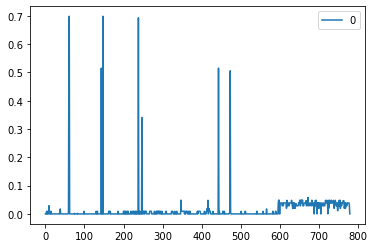

In [167]:
Carbon_predict.plot()

Посмотрим какие признаки оказывают наибольшее влияние

In [168]:
conda install -c conda-forge shap

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [169]:
import shap

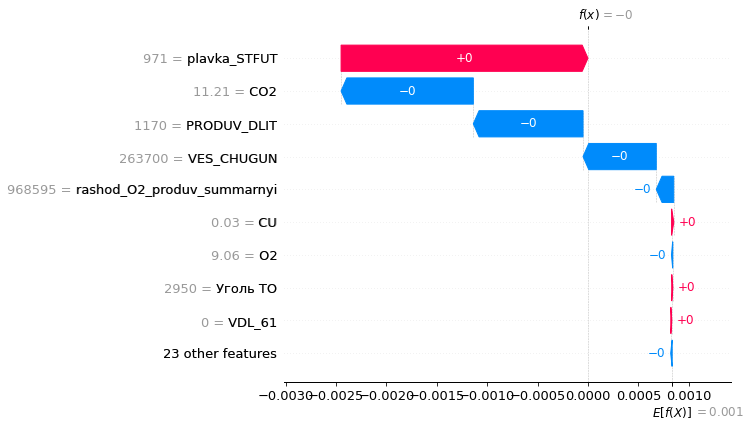

In [170]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(features_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Обучим модель градиентного бустинга для предсказания температуры

In [171]:
model = CatBoostRegressor(loss_function="MAE", learning_rate=0.01, score_function='Cosine', iterations=3000,
                              depth=10, verbose=30, random_state=r)

model.fit(features_train, target_train_t.astype('int'))
predict_train = model.predict(features_train)
result_train = mean_absolute_error(target_train_t, predict_train)
predicted_test_temperature=model.predict(features_test)
print('Лучшее MAE на тренировочных данных', result_train)
temeperature_predict=pd.DataFrame(predicted_test_temperature.tolist())

0:	learn: 23.3959896	total: 72ms	remaining: 3m 36s
30:	learn: 21.0192318	total: 2.13s	remaining: 3m 23s
60:	learn: 19.1389623	total: 3.89s	remaining: 3m 7s
90:	learn: 17.6738408	total: 5.88s	remaining: 3m 8s
120:	learn: 16.4016214	total: 7.55s	remaining: 2m 59s
150:	learn: 15.3910898	total: 9.29s	remaining: 2m 55s
180:	learn: 14.5448003	total: 10.9s	remaining: 2m 49s
210:	learn: 13.8795055	total: 12.7s	remaining: 2m 47s
240:	learn: 13.2671472	total: 14.3s	remaining: 2m 43s
270:	learn: 12.7086291	total: 15.9s	remaining: 2m 39s
300:	learn: 12.2055710	total: 17.5s	remaining: 2m 36s
330:	learn: 11.7564713	total: 19.1s	remaining: 2m 33s
360:	learn: 11.3188390	total: 20.6s	remaining: 2m 30s
390:	learn: 10.9235262	total: 22.2s	remaining: 2m 28s
420:	learn: 10.5410151	total: 23.8s	remaining: 2m 25s
450:	learn: 10.2258473	total: 25.3s	remaining: 2m 22s
480:	learn: 9.9256648	total: 26.9s	remaining: 2m 21s
510:	learn: 9.6514499	total: 28.6s	remaining: 2m 19s
540:	learn: 9.3909863	total: 30.2s	rem

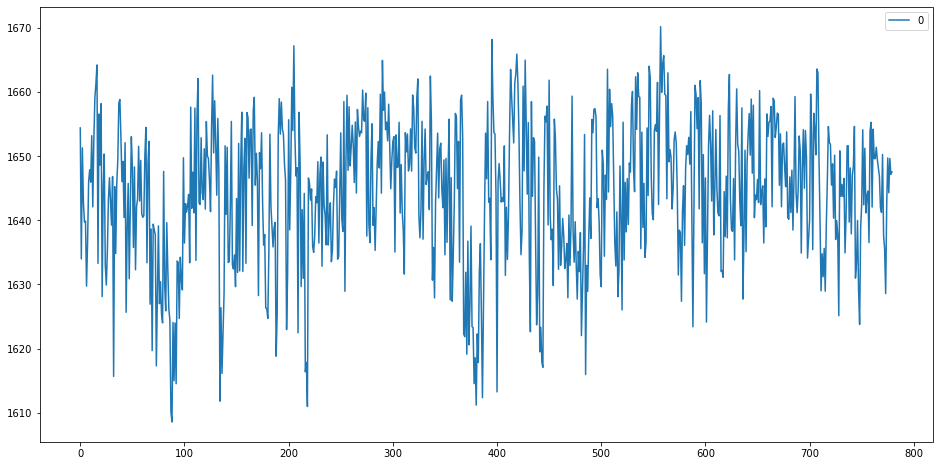

In [172]:
temeperature_predict.plot(figsize=(16,8))

In [173]:
answer = pd.DataFrame(predicted_test_carbon.tolist(), columns = ['C'])

In [174]:
answer['TST'] = temeperature_predict
answer['NPLV'] = data_gas_SUM_test['NPLV']
answer['C']= Carbon_predict
answer = answer[['NPLV', 'TST', 'C']]

In [175]:
answer

,NPLV,TST,C
0,512324,1654.429584,1.108450e-06
1,512327,1633.987233,9.759130e-08
2,512328,1651.319280,1.218613e-07
3,512331,1642.836144,9.327660e-03
4,512333,1639.737738,-3.097259e-06
...,...,...,...
775,513369,1649.735127,3.874355e-02
776,513370,1644.317317,3.874363e-02
777,513371,1649.666935,3.874346e-02
778,513372,1647.189709,2.884275e-02


In [176]:
answer.to_csv('IT_metal.csv', index = False)

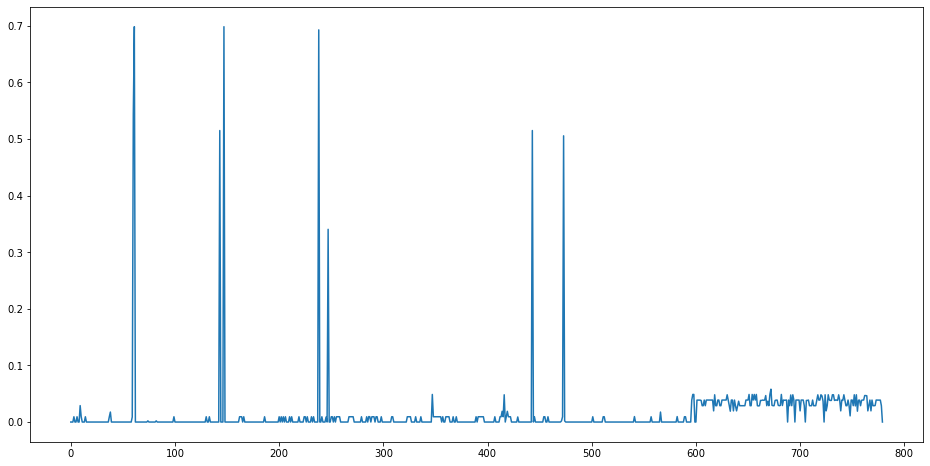

In [177]:
answer['C'].plot(figsize=(16,8))